In [8]:
!pip install ucimlrepo 

In [9]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
diabetes = fetch_ucirepo(id=891)

# Combine features + target
X = diabetes.data.features
y = diabetes.data.targets
df = pd.concat([X, y], axis=1)

# 1️⃣ Total samples and features
n_samples, n_features = df.shape
print(f"Total samples: {n_samples}")
print(f"Total features (including target): {n_features}")
print(f"Target column(s): {y.columns.tolist()}\n")

# 2️⃣ Data types
print("Data Types:\n", df.dtypes, "\n")

# 3️⃣ Unique values per column (first 10 for brevity)
print("Unique values per column:\n")
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals[:10]} ... total unique={len(unique_vals)}")

# 4️⃣ Classify feature type
def classify_feature(col, unique_vals):
    if col in y.columns:
        return "Target"
    elif len(unique_vals) == 2 and set(unique_vals).issubset({0,1}):
        return "Binary"
    elif df[col].dtype in ['float64', 'int64'] and len(unique_vals) > 10:
        return "Continuous"
    else:
        return "Ordinal/Categorical"

# 5️⃣ Print summary table
print("\nFeature Summary:")
print(f"{'Column':30} {'Data Type':10} {'# Unique':10} {'Feature Type':15}")
print("-"*70)
for col in df.columns:
    feature_type = classify_feature(col, df[col].unique())
    print(f"{col:30} {str(df[col].dtype):10} {df[col].nunique():10} {feature_type:15}")


Total samples: 253680
Total features (including target): 22
Target column(s): ['Diabetes_binary']

Data Types:
 HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object 

Unique values per column:

HighBP: [1 0] ... total unique=2
HighChol: [1 0] ... total unique=2
CholCheck: [1 0] ... total unique=2
BMI: [40 25 28 27 24 30 34 26 33 21] ... total unique=84
Smoker: [1 0] ... total 

In [14]:
print("🧾 All column names:\n")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")


🧾 All column names:

1. HighBP
2. HighChol
3. CholCheck
4. BMI
5. Smoker
6. Stroke
7. HeartDiseaseorAttack
8. PhysActivity
9. Fruits
10. Veggies
11. HvyAlcoholConsump
12. AnyHealthcare
13. NoDocbcCost
14. GenHlth
15. MentHlth
16. PhysHlth
17. DiffWalk
18. Sex
19. Age
20. Education
21. Income
22. Diabetes_binary


In [15]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
diabetes = fetch_ucirepo(id=891)

# Combine features + target
X = diabetes.data.features
y = diabetes.data.targets
if isinstance(y, pd.Series):
    y = y.to_frame()
df = pd.concat([X, y], axis=1)

# Basic info
print("✅ Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values:\n", df.isna().sum())


✅ Dataset Shape: (253680, 22)

Columns:
 ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary']

Missing values:
 HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


In [16]:
# Summary stats
print("\n--- Summary Statistics ---\n")
print(df.describe())

# Count target values
print("\n--- Target Value Counts ---\n")
print(df[y.columns[0]].value_counts())



--- Summary Statistics ---

              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000          

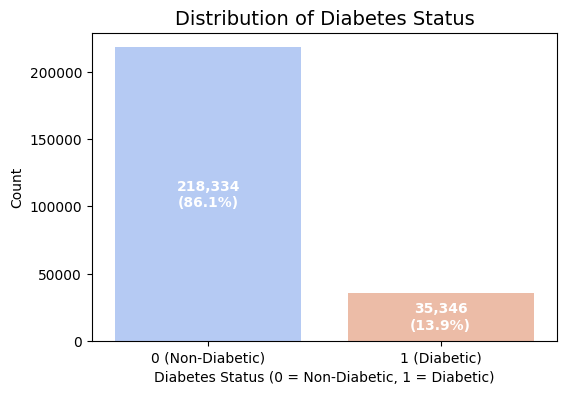

🔹 Diabetes Distribution:
  → 0: 218,334 (86.07%)
  → 1: 35,346 (13.93%)


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count values
counts = df[y.columns[0]].value_counts().sort_index()
total = len(df)

# Plot
plt.figure(figsize=(6,4))
ax = sns.countplot(x=y.columns[0], data=df, palette="coolwarm")
plt.title("Distribution of Diabetes Status", fontsize=14)
plt.xlabel("Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Count")

# Add text *inside* bars
for i, count in enumerate(counts):
    pct = count / total * 100
    ax.text(i, count / 2, f"{count:,}\n({pct:.1f}%)", 
            ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.xticks([0,1], ["0 (Non-Diabetic)", "1 (Diabetic)"])
plt.show()

# Print exact numbers
print("🔹 Diabetes Distribution:")
for label, count in counts.items():
    print(f"  → {label}: {count:,} ({count/total:.2%})")


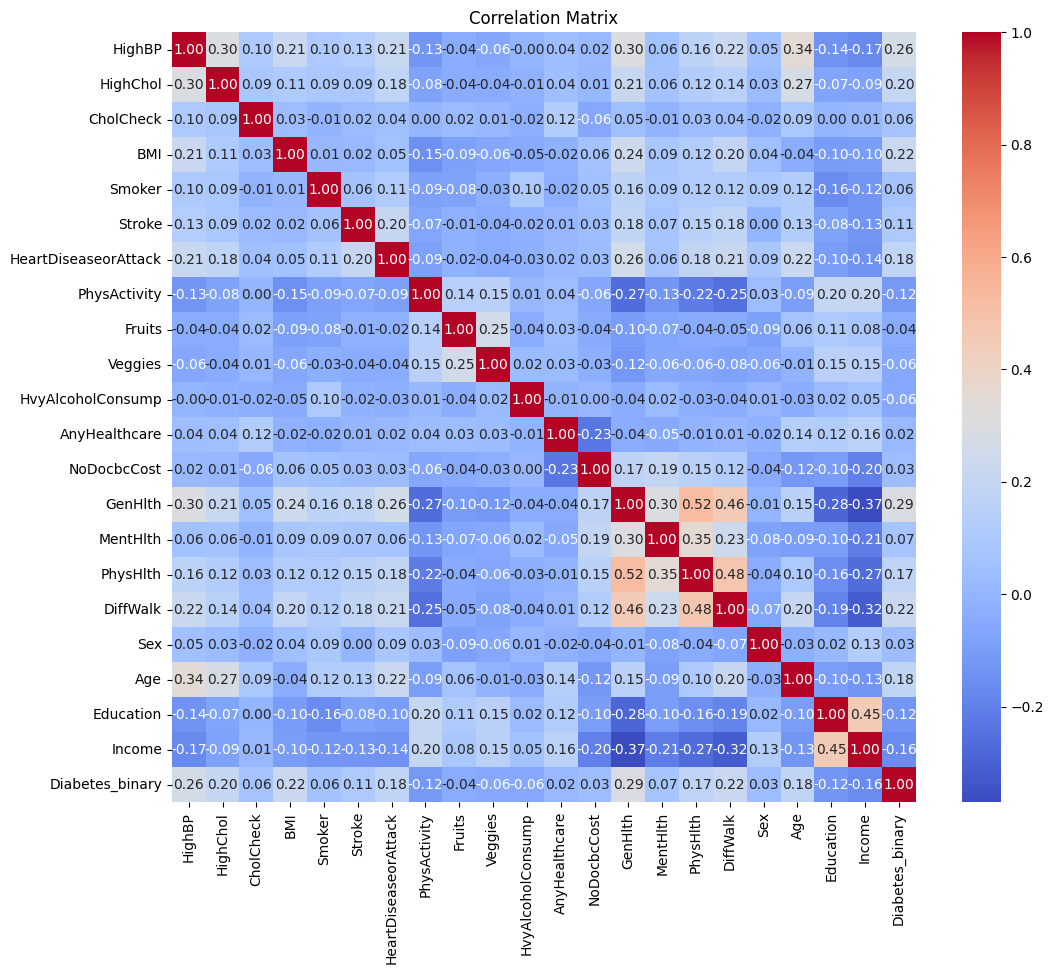


Top features correlated with target:
 Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


In [18]:
# Correlation matrix
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Top correlations with target
target_corr = corr[y.columns[0]].sort_values(ascending=False)
print("\nTop features correlated with target:\n", target_corr)


✅ Dataset Loaded: 253680 samples, 22 columns

🔹 Hypothesis 1: Correlation between BMI and Diabetes_binary
Test: Pearson Correlation
H0: No correlation between BMI and Diabetes_binary
H1: Significant correlation exists between BMI and Diabetes_binary
Pearson correlation coefficient (r) = 0.2168
p-value = 0.0000e+00
✅ Result: Reject H0 → Significant correlation exists


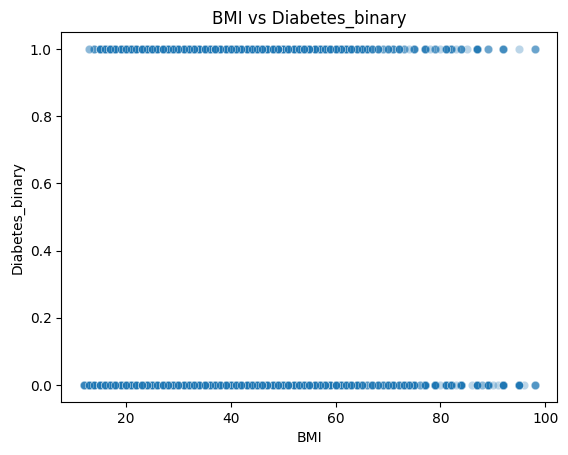


🔹 Hypothesis 2: Age follows Poisson distribution?
Test: Chi-Square Goodness of Fit
H0: Age follows Poisson distribution
H1: Age does NOT follow Poisson distribution
Chi-square statistic = 72131.33
p-value = 0.0000e+00
❌ Result: Reject H0 → Age does NOT follow Poisson distribution


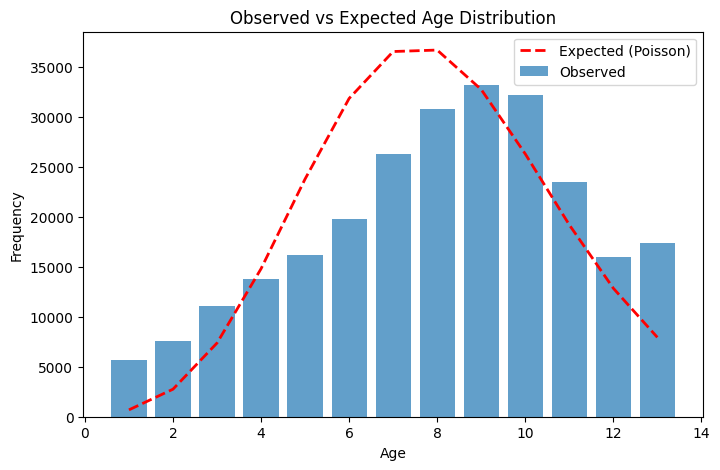


🔹 Hypothesis 3: Sex vs Diabetes_binary Independence Test
Test: Chi-Square Test of Independence
H0: Sex and Diabetes_binary are independent
H1: Sex and Diabetes_binary are dependent
Chi-square statistic = 250.41
p-value = 2.1099e-56
✅ Result: Reject H0 → Sex and Diabetes_binary are dependent


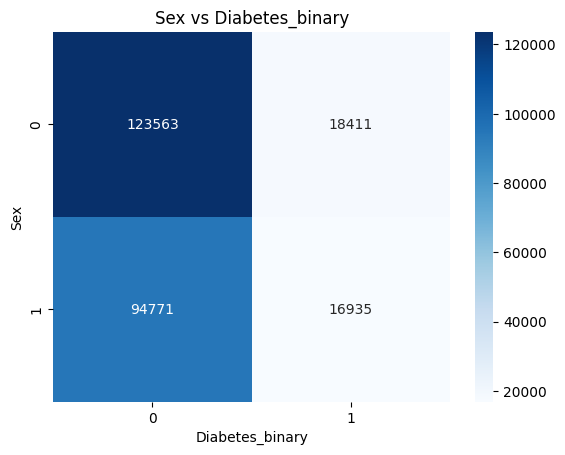


🔹 Hypothesis 4: BMI Difference by Sex
Test: Independent Sample t-Test
H0: Mean BMI is equal for males and females
H1: Mean BMI differs between males and females
t-statistic = 22.11
p-value = 2.9243e-108
✅ Result: Reject H0 → Mean BMI differs by Sex


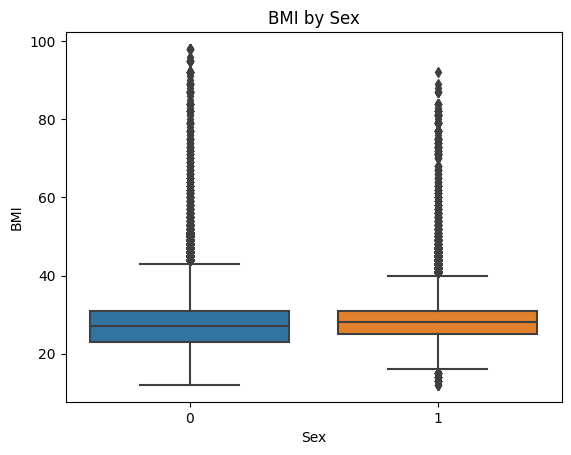


🔹 Hypothesis 5: BMI Difference across Education Levels
Test: One-Way ANOVA
H0: Mean BMI is same across all Education levels
H1: At least one Education group has different mean BMI
F-statistic = 669.55
p-value = 0.0000e+00
✅ Result: Reject H0 → Mean BMI differs across Education levels


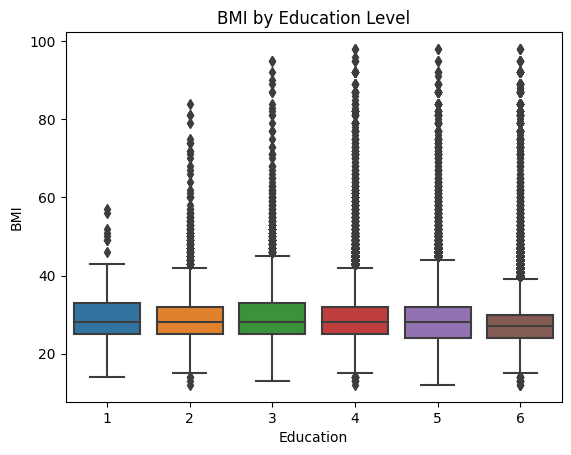


🔹 Hypothesis 6: Income vs Diabetes_binary Independence Test
Test: Chi-Square Test of Independence
H0: Income and Diabetes_binary are independent
H1: Income and Diabetes_binary are dependent
Chi-square statistic = 7003.72
p-value = 0.0000e+00
✅ Result: Reject H0 → Income and Diabetes_binary are dependent


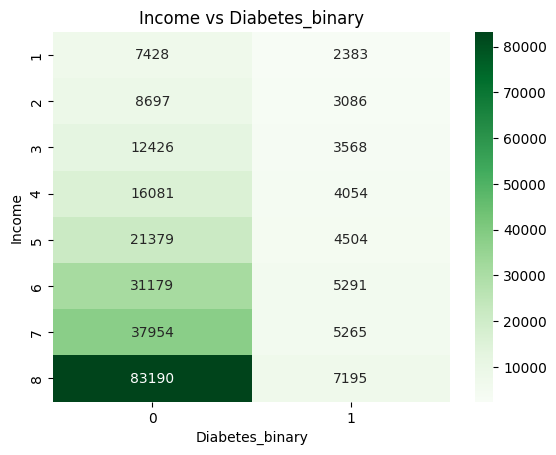


🔹 Hypothesis 7: HighBP difference by Income group
Test: One-Way ANOVA
H0: Mean HighBP is equal across Income groups
H1: At least one Income group has different mean HighBP
F-statistic = 1212.75
p-value = 0.0000e+00
✅ Result: Reject H0 → Mean HighBP differs across Income groups


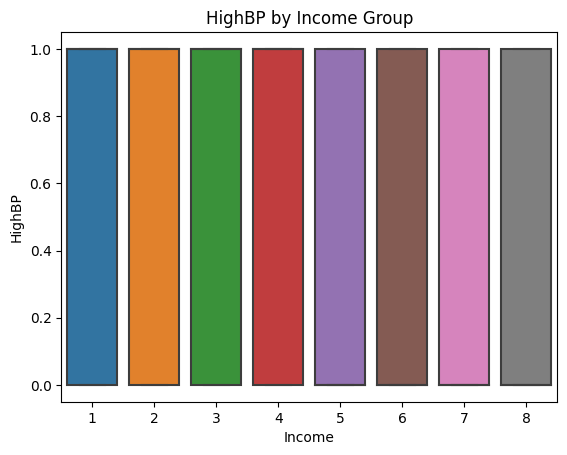



📋 Summary of Statistical Tests:
   Test No                 Test Description            Test Type  \
0        1      BMI vs Diabetes Correlation  Pearson Correlation   
1        2                  Age Poisson Fit       Chi-Square GOF   
2        3     Sex vs Diabetes Independence    Chi-Square Indep.   
3        4              BMI by Sex (t-Test)               t-Test   
4        5         BMI by Education (ANOVA)        One-Way ANOVA   
5        6  Income vs Diabetes Independence    Chi-Square Indep.   
6        7         HighBP by Income (ANOVA)        One-Way ANOVA   

         p-value                        Decision (p<0.05)  
0   0.000000e+00  Reject/Fail H0 as per above explanation  
1   0.000000e+00  Reject/Fail H0 as per above explanation  
2   2.109875e-56  Reject/Fail H0 as per above explanation  
3  2.924275e-108  Reject/Fail H0 as per above explanation  
4   0.000000e+00  Reject/Fail H0 as per above explanation  
5   0.000000e+00  Reject/Fail H0 as per above explanation  
6

In [8]:
# ==========================================================
# 📊 Statistical Experiments on UCI Diabetes Dataset (ID 891)
# ==========================================================

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# ---------------------------
# 1️⃣ Load and Prepare Dataset
# ---------------------------
diabetes = fetch_ucirepo(id=891)
X = diabetes.data.features
y = diabetes.data.targets
df = pd.concat([X, y], axis=1)

print(f"✅ Dataset Loaded: {df.shape[0]} samples, {df.shape[1]} columns")

# ------------------------------------------------------------
# 2️⃣ Hypothesis 1 — Correlation between BMI and Diabetes_binary
# ------------------------------------------------------------
print("\n🔹 Hypothesis 1: Correlation between BMI and Diabetes_binary")
print("Test: Pearson Correlation")
print("H0: No correlation between BMI and Diabetes_binary")
print("H1: Significant correlation exists between BMI and Diabetes_binary")
r, p1 = stats.pearsonr(df['BMI'], df['Diabetes_binary'])
print(f"Pearson correlation coefficient (r) = {r:.4f}")
print(f"p-value = {p1:.4e}")
if p1 < 0.05:
    print("✅ Result: Reject H0 → Significant correlation exists")
else:
    print("❌ Result: Fail to Reject H0 → No significant correlation")
sns.scatterplot(x='BMI', y='Diabetes_binary', data=df, alpha=0.3)
plt.title("BMI vs Diabetes_binary")
plt.show()

# ----------------------------------------------------------
# 3️⃣ Hypothesis 2 — Age follows Poisson distribution or not
# ----------------------------------------------------------
print("\n🔹 Hypothesis 2: Age follows Poisson distribution?")
print("Test: Chi-Square Goodness of Fit")
print("H0: Age follows Poisson distribution")
print("H1: Age does NOT follow Poisson distribution")
age_counts = df['Age'].value_counts().sort_index()
lambda_age = df['Age'].mean()
expected = stats.poisson.pmf(age_counts.index, mu=lambda_age) * len(df)
expected = expected * (age_counts.sum() / expected.sum())  # normalize total counts
chi2, p2 = stats.chisquare(age_counts, expected)
print(f"Chi-square statistic = {chi2:.2f}")
print(f"p-value = {p2:.4e}")
if p2 < 0.05:
    print("❌ Result: Reject H0 → Age does NOT follow Poisson distribution")
else:
    print("✅ Result: Fail to Reject H0 → Age may follow Poisson distribution")
plt.figure(figsize=(8,5))
plt.bar(age_counts.index, age_counts.values, alpha=0.7, label="Observed")
plt.plot(age_counts.index, expected, 'r--', linewidth=2, label="Expected (Poisson)")
plt.title("Observed vs Expected Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# --------------------------------------------------------------------
# 4️⃣ Hypothesis 3 — Sex and Diabetes_binary are independent or dependent
# --------------------------------------------------------------------
print("\n🔹 Hypothesis 3: Sex vs Diabetes_binary Independence Test")
print("Test: Chi-Square Test of Independence")
print("H0: Sex and Diabetes_binary are independent")
print("H1: Sex and Diabetes_binary are dependent")
contingency = pd.crosstab(df['Sex'], df['Diabetes_binary'])
chi2, p3, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square statistic = {chi2:.2f}")
print(f"p-value = {p3:.4e}")
if p3 < 0.05:
    print("✅ Result: Reject H0 → Sex and Diabetes_binary are dependent")
else:
    print("❌ Result: Fail to Reject H0 → Sex and Diabetes_binary are independent")
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues")
plt.title("Sex vs Diabetes_binary")
plt.show()

# ---------------------------------------------------------
# 5️⃣ Hypothesis 4 — BMI differs between Male and Female?
# ---------------------------------------------------------
print("\n🔹 Hypothesis 4: BMI Difference by Sex")
print("Test: Independent Sample t-Test")
print("H0: Mean BMI is equal for males and females")
print("H1: Mean BMI differs between males and females")
bmi_male = df[df['Sex'] == 1]['BMI']
bmi_female = df[df['Sex'] == 0]['BMI']
t_stat, p4 = stats.ttest_ind(bmi_male, bmi_female, equal_var=False)
print(f"t-statistic = {t_stat:.2f}")
print(f"p-value = {p4:.4e}")
if p4 < 0.05:
    print("✅ Result: Reject H0 → Mean BMI differs by Sex")
else:
    print("❌ Result: Fail to Reject H0 → No significant difference in BMI by Sex")
sns.boxplot(x='Sex', y='BMI', data=df)
plt.title("BMI by Sex")
plt.show()

# ----------------------------------------------------------------
# 6️⃣ Hypothesis 5 — BMI differs by Education level (One-Way ANOVA)
# ----------------------------------------------------------------
print("\n🔹 Hypothesis 5: BMI Difference across Education Levels")
print("Test: One-Way ANOVA")
print("H0: Mean BMI is same across all Education levels")
print("H1: At least one Education group has different mean BMI")
groups = [group['BMI'].values for _, group in df.groupby('Education')]
f_stat, p5 = stats.f_oneway(*groups)
print(f"F-statistic = {f_stat:.2f}")
print(f"p-value = {p5:.4e}")
if p5 < 0.05:
    print("✅ Result: Reject H0 → Mean BMI differs across Education levels")
else:
    print("❌ Result: Fail to Reject H0 → No significant difference in BMI by Education")
sns.boxplot(x='Education', y='BMI', data=df)
plt.title("BMI by Education Level")
plt.show()

# ----------------------------------------------------------------
# 7️⃣ Hypothesis 6 — Income and Diabetes_binary Independence Test
# ----------------------------------------------------------------
print("\n🔹 Hypothesis 6: Income vs Diabetes_binary Independence Test")
print("Test: Chi-Square Test of Independence")
print("H0: Income and Diabetes_binary are independent")
print("H1: Income and Diabetes_binary are dependent")
contingency = pd.crosstab(df['Income'], df['Diabetes_binary'])
chi2, p6, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square statistic = {chi2:.2f}")
print(f"p-value = {p6:.4e}")
if p6 < 0.05:
    print("✅ Result: Reject H0 → Income and Diabetes_binary are dependent")
else:
    print("❌ Result: Fail to Reject H0 → Income and Diabetes_binary are independent")
sns.heatmap(contingency, annot=True, fmt="d", cmap="Greens")
plt.title("Income vs Diabetes_binary")
plt.show()

# ----------------------------------------------------------------
# 8️⃣ Hypothesis 7 — HighBP differs across Income groups (ANOVA)
# ----------------------------------------------------------------
print("\n🔹 Hypothesis 7: HighBP difference by Income group")
print("Test: One-Way ANOVA")
print("H0: Mean HighBP is equal across Income groups")
print("H1: At least one Income group has different mean HighBP")
groups = [group['HighBP'].values for _, group in df.groupby('Income')]
f_stat, p7 = stats.f_oneway(*groups)
print(f"F-statistic = {f_stat:.2f}")
print(f"p-value = {p7:.4e}")
if p7 < 0.05:
    print("✅ Result: Reject H0 → Mean HighBP differs across Income groups")
else:
    print("❌ Result: Fail to Reject H0 → No significant difference in HighBP across Income groups")
sns.boxplot(x='Income', y='HighBP', data=df)
plt.title("HighBP by Income Group")
plt.show()

# ==============================================================
# ✅ Summary Table of Results
# ==============================================================
results = pd.DataFrame({
    "Test No": [1,2,3,4,5,6,7],
    "Test Description": [
        "BMI vs Diabetes Correlation",
        "Age Poisson Fit",
        "Sex vs Diabetes Independence",
        "BMI by Sex (t-Test)",
        "BMI by Education (ANOVA)",
        "Income vs Diabetes Independence",
        "HighBP by Income (ANOVA)"
    ],
    "Test Type": [
        "Pearson Correlation", "Chi-Square GOF", "Chi-Square Indep.",
        "t-Test", "One-Way ANOVA", "Chi-Square Indep.", "One-Way ANOVA"
    ],
    "p-value": [p1, p2, p3, p4, p5, p6, p7],
    "Decision (p<0.05)": [
        "Reject/Fail H0 as per above explanation"
    ]*7
})

print("\n\n📋 Summary of Statistical Tests:")
print(results)


In [9]:
from scipy.stats import chi2_contingency

# Contingency table
cont_bp = pd.crosstab(df['HighBP'], df['Diabetes_binary'])
chi2_bp, p_bp, dof_bp, expected_bp = chi2_contingency(cont_bp)

print("Chi-Square Test: High Blood Pressure vs Diabetes")
print(f"Chi2 = {chi2_bp:.4f}, p-value = {p_bp:.4e}")
if p_bp < 0.05:
    print("✅ Reject H₀ → High Blood Pressure and Diabetes are related.\n")
else:
    print("❌ Fail to Reject H₀ → No significant relation.\n")


Chi-Square Test: High Blood Pressure vs Diabetes
Chi2 = 17562.4461, p-value = 0.0000e+00
✅ Reject H₀ → High Blood Pressure and Diabetes are related.



In [10]:
cont_chol = pd.crosstab(df['HighChol'], df['Diabetes_binary'])
chi2_chol, p_chol, dof_chol, expected_chol = chi2_contingency(cont_chol)

print("Chi-Square Test: High Cholesterol vs Diabetes")
print(f"Chi2 = {chi2_chol:.4f}, p-value = {p_chol:.4e}")
if p_chol < 0.05:
    print("✅ Reject H₀ → High Cholesterol and Diabetes are related.\n")
else:
    print("❌ Fail to Reject H₀ → No significant relation.\n")


Chi-Square Test: High Cholesterol vs Diabetes
Chi2 = 10174.0749, p-value = 0.0000e+00
✅ Reject H₀ → High Cholesterol and Diabetes are related.



In [11]:
cont_pa = pd.crosstab(df['PhysActivity'], df['Diabetes_binary'])
chi2_pa, p_pa, dof_pa, expected_pa = chi2_contingency(cont_pa)

print("Chi-Square Test: Physical Activity vs Diabetes")
print(f"Chi2 = {chi2_pa:.4f}, p-value = {p_pa:.4e}")
if p_pa < 0.05:
    print("✅ Reject H₀ → Physical Activity and Diabetes are related.\n")
else:
    print("❌ Fail to Reject H₀ → No significant relation.\n")


Chi-Square Test: Physical Activity vs Diabetes
Chi2 = 3539.4194, p-value = 0.0000e+00
✅ Reject H₀ → Physical Activity and Diabetes are related.



In [12]:
from scipy.stats import mannwhitneyu

bmi_d = df[df['Diabetes_binary'] == 1]['BMI']
bmi_nd = df[df['Diabetes_binary'] == 0]['BMI']

stat_bmi, p_bmi = mannwhitneyu(bmi_d, bmi_nd)

print("Mann–Whitney U Test: BMI between Diabetic and Non-Diabetic")
print(f"U = {stat_bmi:.4f}, p-value = {p_bmi:.4e}")
if p_bmi < 0.05:
    print("✅ Reject H₀ → BMI distributions differ significantly.\n")
else:
    print("❌ Fail to Reject H₀ → No significant difference.\n")


Mann–Whitney U Test: BMI between Diabetic and Non-Diabetic
U = 5311898347.5000, p-value = 0.0000e+00
✅ Reject H₀ → BMI distributions differ significantly.



In [13]:
from scipy.stats import ttest_ind

age_d = df[df['Diabetes_binary'] == 1]['Age']
age_nd = df[df['Diabetes_binary'] == 0]['Age']

t_age, p_age = ttest_ind(age_d, age_nd, equal_var=False)

print("Independent T-Test: Age between Diabetic and Non-Diabetic")
print(f"t-statistic = {t_age:.4f}, p-value = {p_age:.4e}")
if p_age < 0.05:
    print("✅ Reject H₀ → Mean Age differs significantly.\n")
else:
    print("❌ Fail to Reject H₀ → No significant difference.\n")


Independent T-Test: Age between Diabetic and Non-Diabetic
t-statistic = 111.3085, p-value = 0.0000e+00
✅ Reject H₀ → Mean Age differs significantly.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

# Statistical Tests
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind, kstest

# Model Interpretation
try:
    import shap
except:
    print("SHAP not installed. Install with: pip install shap")

# Model Persistence
import joblib
import os

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Create output directories
os.makedirs('outputs', exist_ok=True)
os.makedirs('outputs/graphs', exist_ok=True)
os.makedirs('outputs/datasets', exist_ok=True)
os.makedirs('outputs/models', exist_ok=True)
os.makedirs('outputs/predictions', exist_ok=True)

In [2]:
print("="*80)
print("DATA LOADING")
print("="*80)

# Load balanced dataset for training
df_original = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

print(f" Dataset loaded successfully")
print(f"  Shape: {df_original.shape}")
print(f"  Features: {df_original.shape[1]}")
print(f"  Samples: {df_original.shape[0]}")

DATA LOADING
 Dataset loaded successfully
  Shape: (70692, 22)
  Features: 22
  Samples: 70692



EDA

Dataset Info:
  Columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
  Missing Values: 0
  Duplicates: 1635

Target Distribution:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

Class Balance:
Diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

 Descriptive statistics calculated


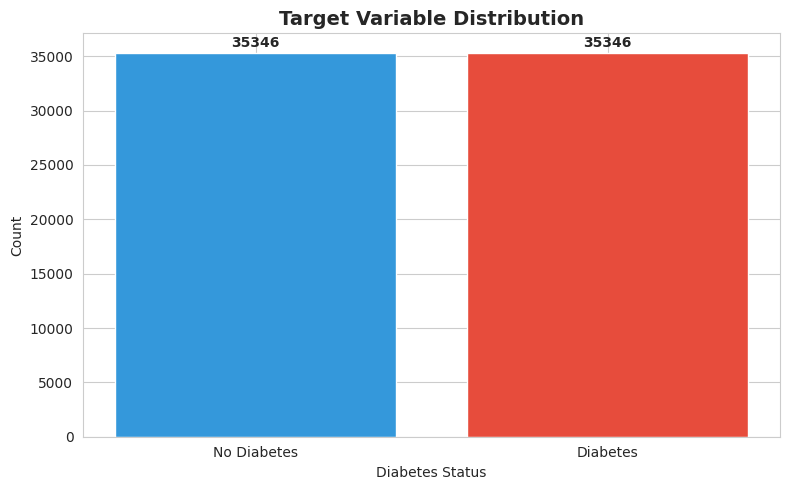

 Graph saved: 01_target_distribution.png


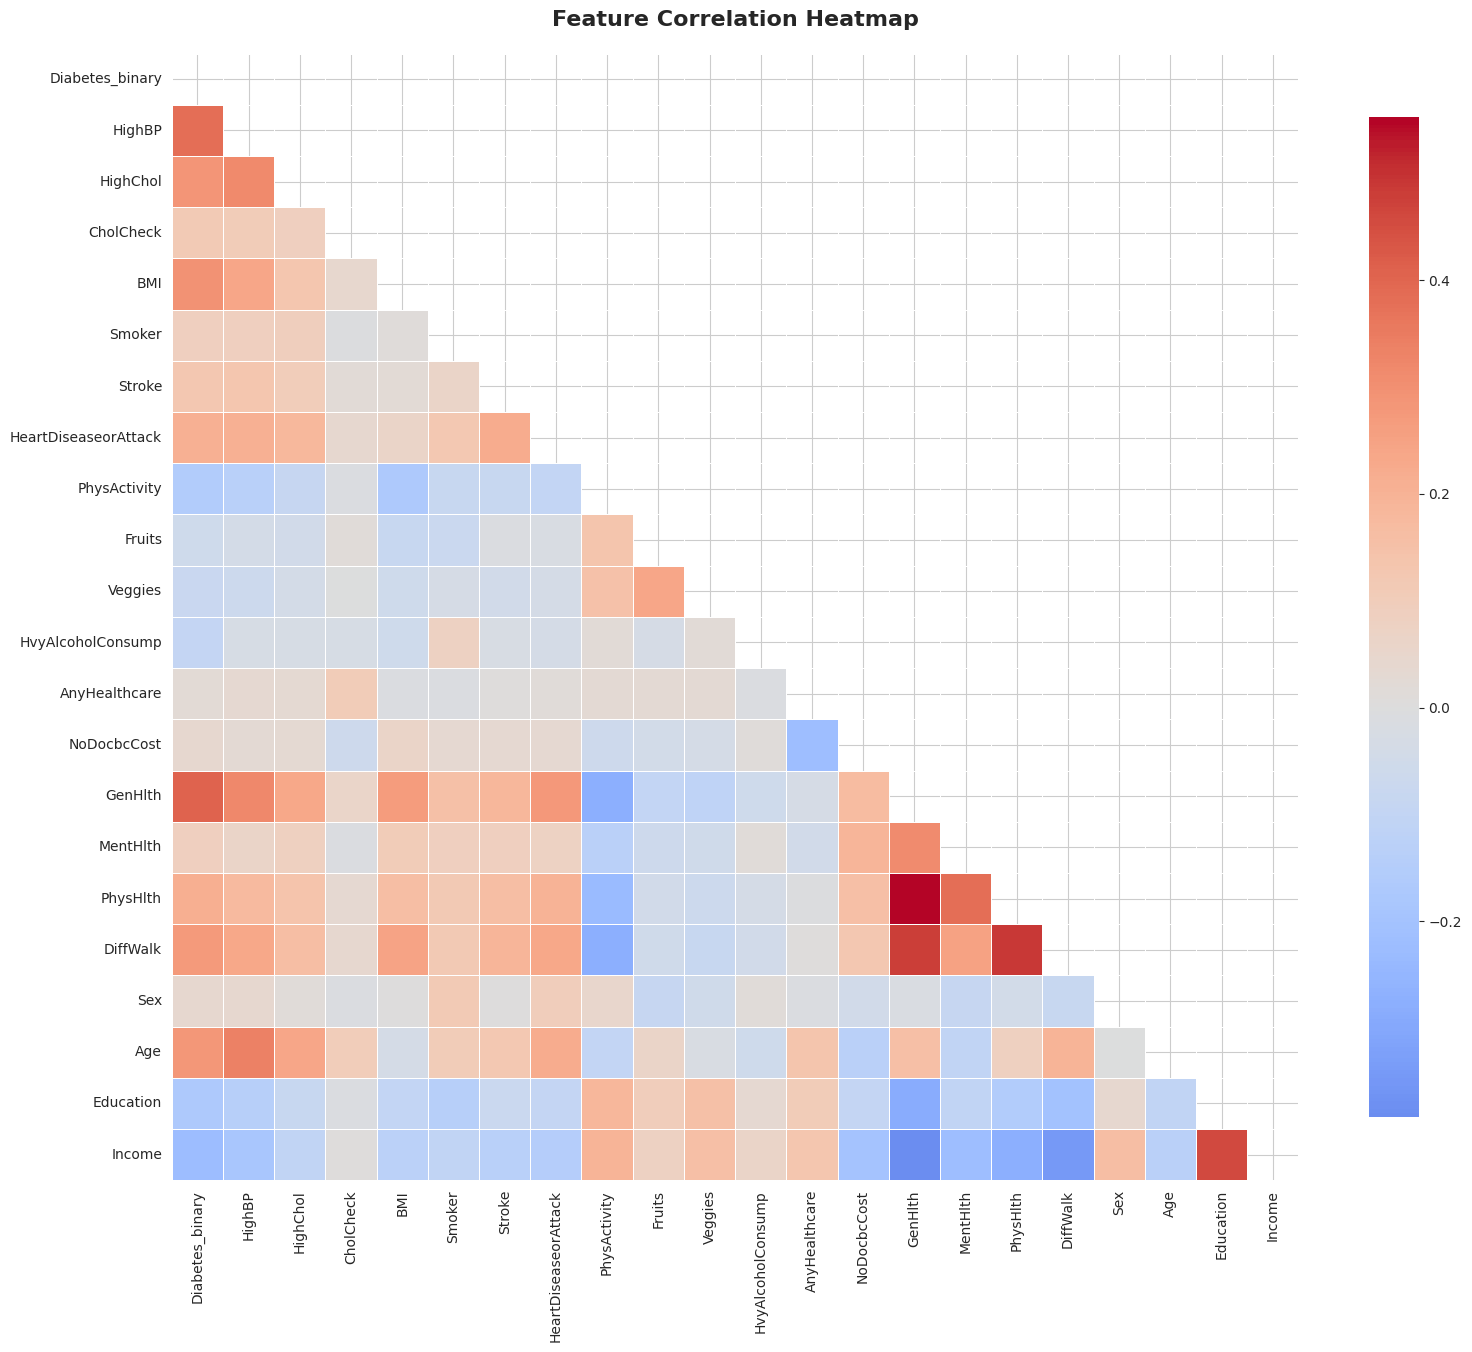

 Graph saved: 02_correlation_heatmap.png

Top 5 Features Correlated with Diabetes:
  1. GenHlth: 0.4076
  2. HighBP: 0.3815
  3. BMI: 0.2934
  4. HighChol: 0.2892
  5. Age: 0.2787


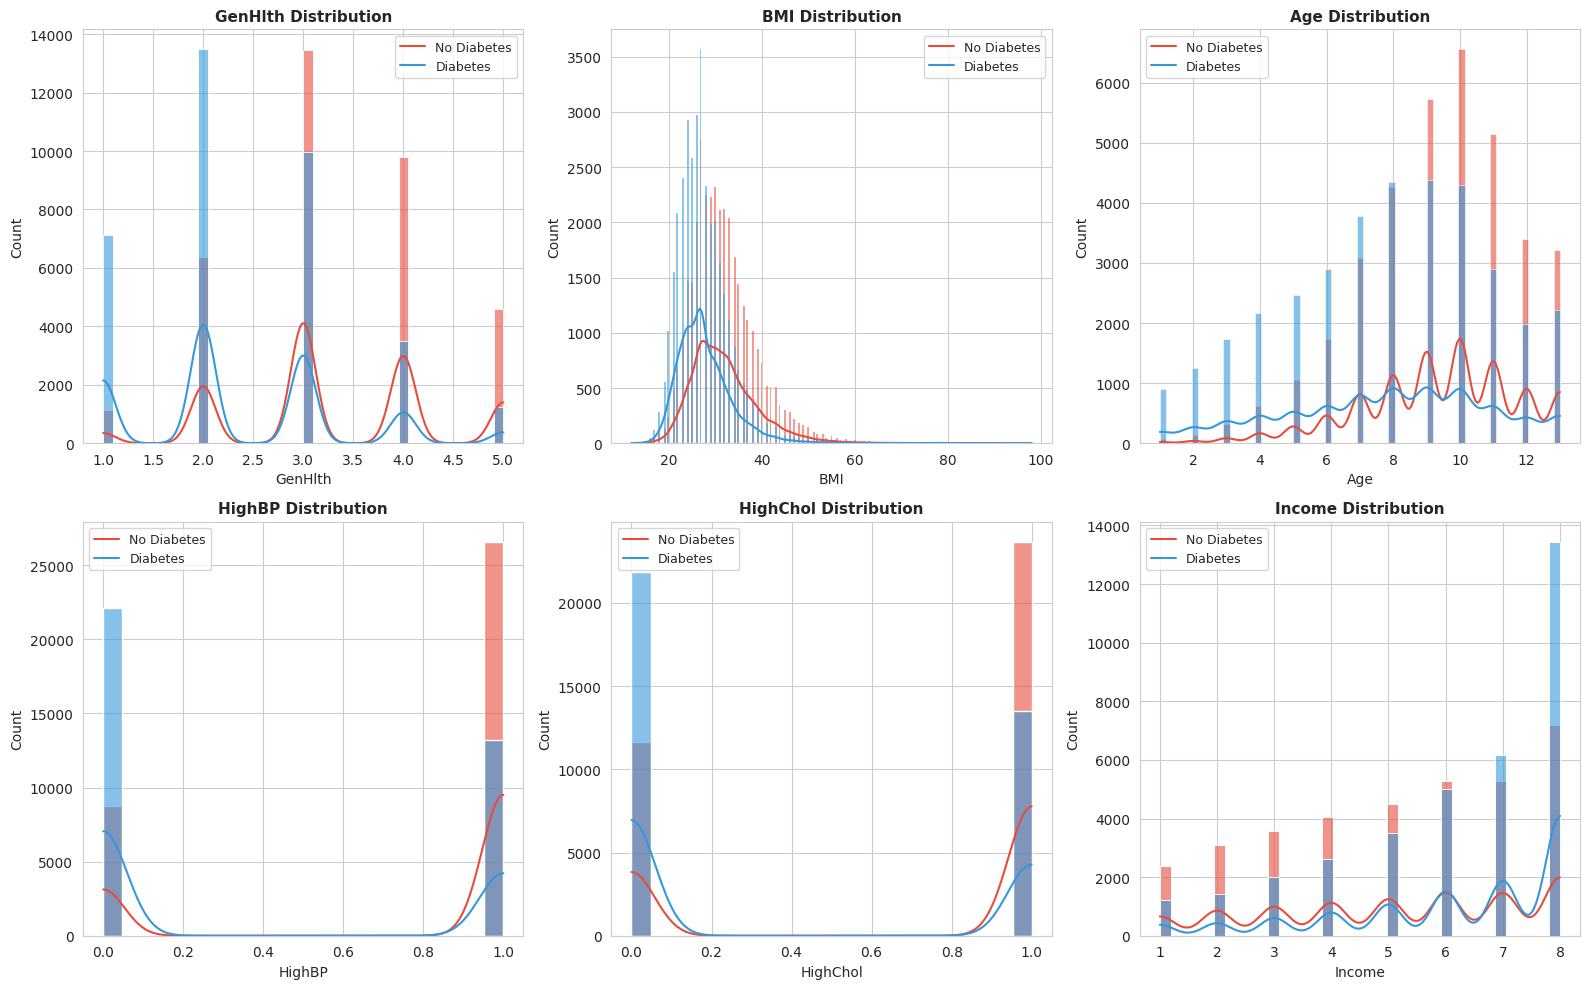

 Graph saved: 03_feature_distributions.png


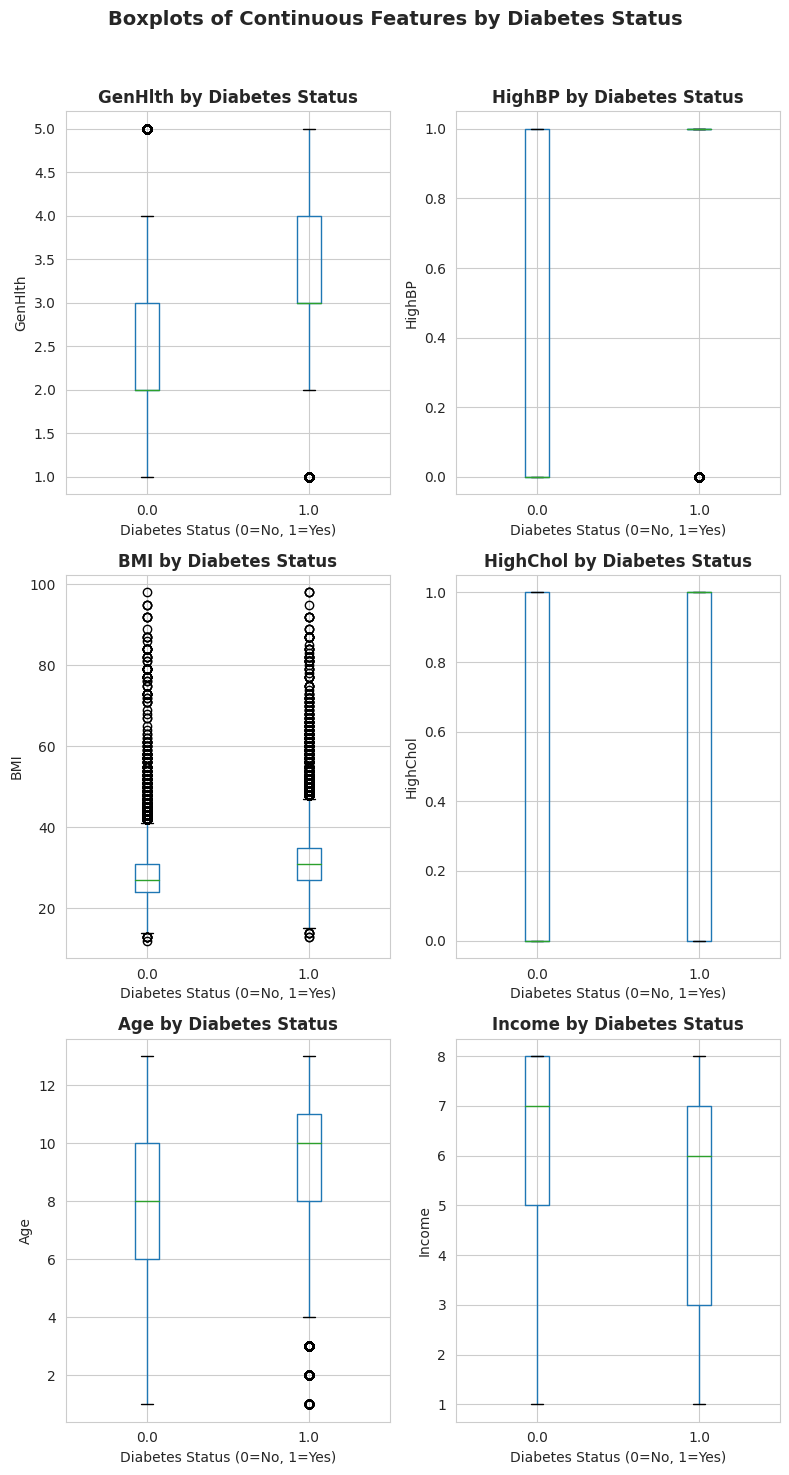

✅ Graph saved: 04_boxplots.png


In [35]:
print("\n" + "="*80)
print("EDA")
print("="*80)

df = df_original.copy()

# Basic information
print("\nDataset Info:")
print(f"  Columns: {df.columns.tolist()}")
print(f"  Missing Values: {df.isnull().sum().sum()}")
print(f"  Duplicates: {df.duplicated().sum()}")

# Target distribution
print(f"\nTarget Distribution:")
print(df['Diabetes_binary'].value_counts())
print(f"\nClass Balance:")
print(df['Diabetes_binary'].value_counts(normalize=True))

# Descriptive statistics
desc_stats = df.describe()
print("\n Descriptive statistics calculated")

# GRAPH 1: Target Distribution
plt.figure(figsize=(8, 5))
target_counts = df['Diabetes_binary'].value_counts()
plt.bar(['No Diabetes', 'Diabetes'], target_counts.values, color=['#3498db', '#e74c3c'])
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/graphs/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Graph saved: 01_target_distribution.png")

# GRAPH 2: Correlation Heatmap
plt.figure(figsize=(16, 14))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('outputs/graphs/02_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Graph saved: 02_correlation_heatmap.png")

# Top correlations with target
target_corr = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print("\nTop 5 Features Correlated with Diabetes:")
for i, (feature, corr) in enumerate(target_corr[1:6].items(), 1):
    print(f"  {i}. {feature}: {corr:.4f}")

# GRAPH 3: Feature Distributions
key_features = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'Income']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    sns.histplot(data=df, x=feature, hue='Diabetes_binary', 
                 kde=True, ax=axes[idx], palette=['#3498db', '#e74c3c'], alpha=0.6)
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].legend(['No Diabetes', 'Diabetes'], fontsize=9)

plt.tight_layout()
plt.savefig('outputs/graphs/03_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Graph saved: 03_feature_distributions.png")

# GRAPH 4: Boxplots for Continuous Features
# ==========================================================
# 📊 GRAPH 4: Boxplots for Continuous Features (2x3 layout)
# ==========================================================


continuous_features = [
    'GenHlth', 
    'HighBP', 
    'BMI', 
    'HighChol', 
    'Age',
    'Income'
]

# Create 2 rows x 3 columns subplot grid
fig, axes = plt.subplots(3, 2, figsize=(8,15))

# Flatten axes array for easy iteration
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    df.boxplot(column=feature, by='Diabetes_binary', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Diabetes Status', fontweight='bold')
    axes[idx].set_xlabel('Diabetes Status (0=No, 1=Yes)')
    axes[idx].set_ylabel(feature)

# Adjust layout
plt.suptitle('Boxplots of Continuous Features by Diabetes Status', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('outputs/graphs/04_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graph saved: 04_boxplots.png")


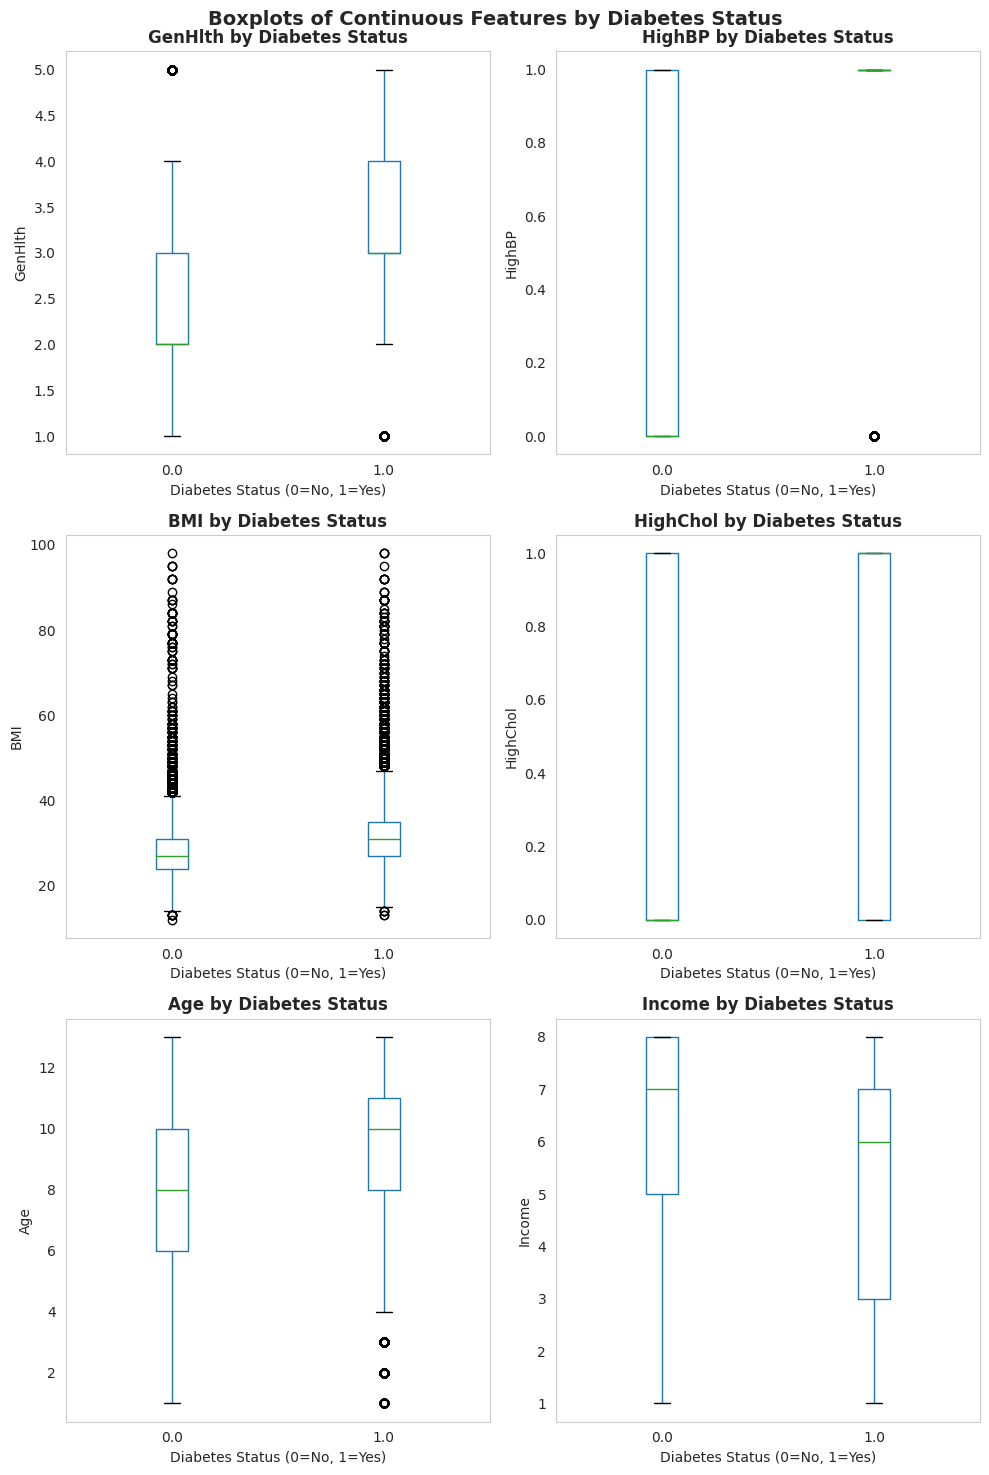

In [38]:
# ==========================================================
# 📊 GRAPH 4: Boxplots for Continuous Features
# ==========================================================
import matplotlib.pyplot as plt

continuous_features = [
    'GenHlth', 
    'HighBP', 
    'BMI', 
    'HighChol', 
    'Age',
    'Income'
]

# Create a 2x3 grid for 6 features
fig, axes = plt.subplots(3, 2, figsize=(10,15))

# Flatten axes for easy iteration
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    df.boxplot(column=feature, by='Diabetes_binary', ax=axes[idx], grid=False)
    axes[idx].set_title(f'{feature} by Diabetes Status', fontweight='bold')
    axes[idx].set_xlabel('Diabetes Status (0=No, 1=Yes)')
    axes[idx].set_ylabel(feature)

# Hide empty plots if any
for j in range(len(continuous_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots of Continuous Features by Diabetes Status', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/graphs/04_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()



In [4]:
# Display first few rows
print(df_original.head())

# Check data types and missing values
print(df_original.info())
print(df_original.isnull().sum())

# Summary statistics
print(df_original.describe())


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


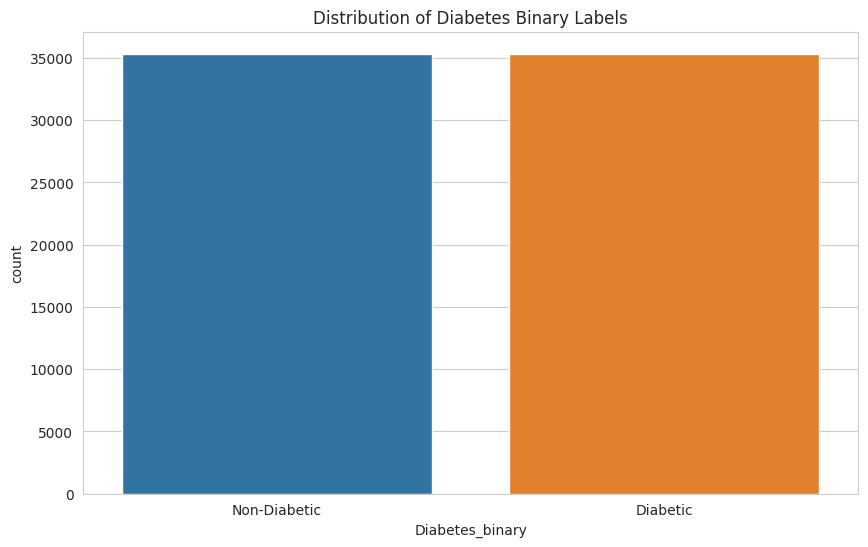

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df_original['Diabetes_binary'].value_counts())

sns.countplot(x='Diabetes_binary', data=df_original)
plt.title("Distribution of Diabetes Binary Labels")
plt.xticks([0,1], ['Non-Diabetic', 'Diabetic'])
plt.show()


DATA LOADING
 Dataset loaded successfully
  Shape: (70692, 22)
  Features: 21,Label: 1
  Samples: 70692

First 5 rows:
    Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  M

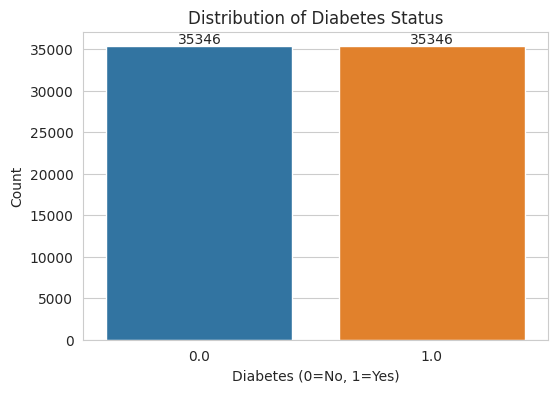

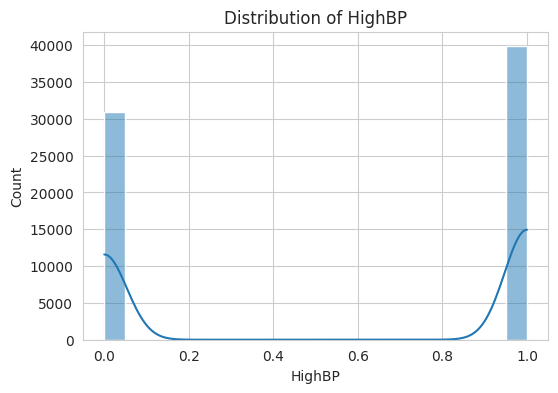

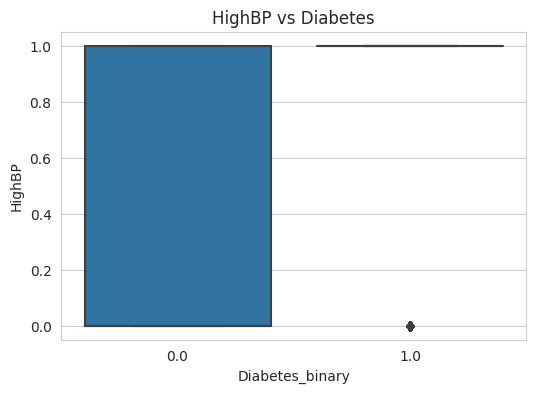

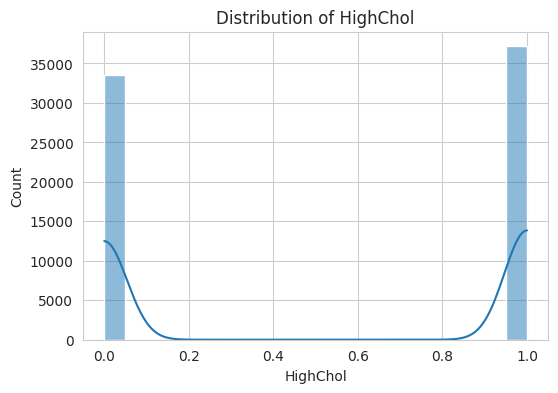

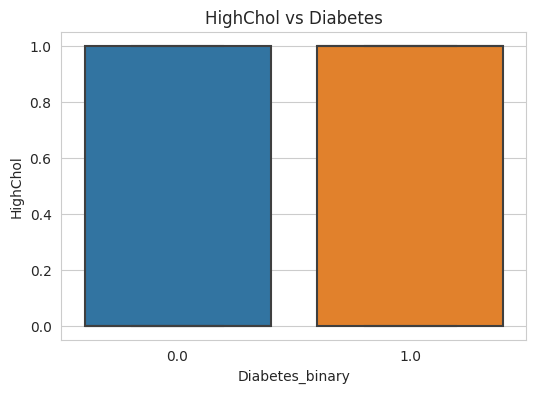

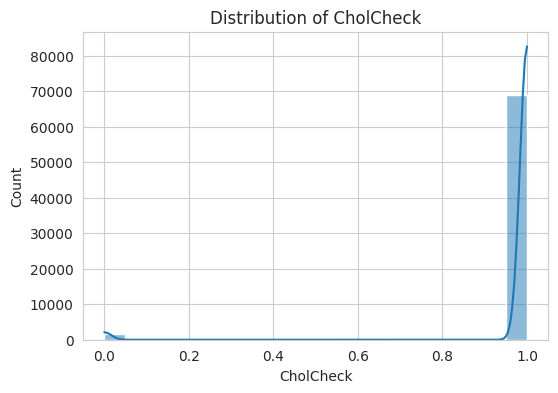

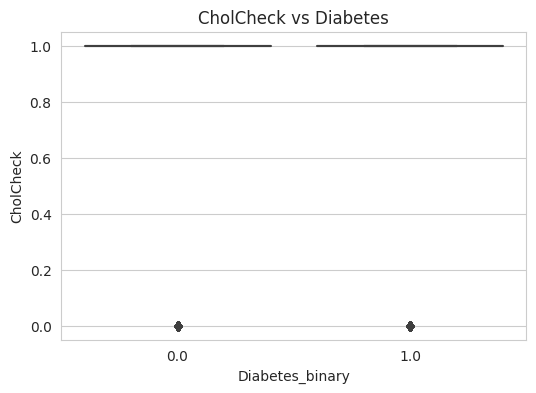

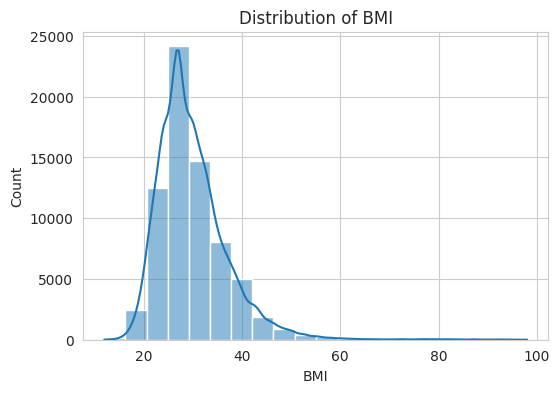

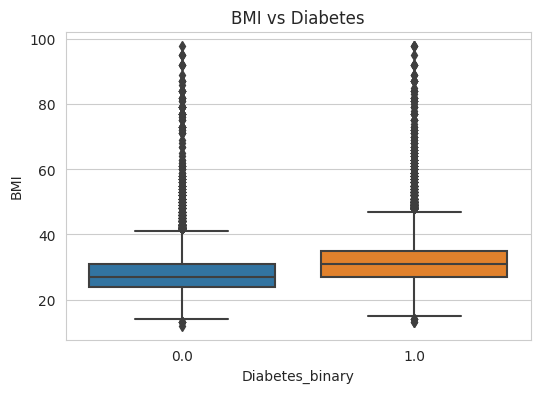

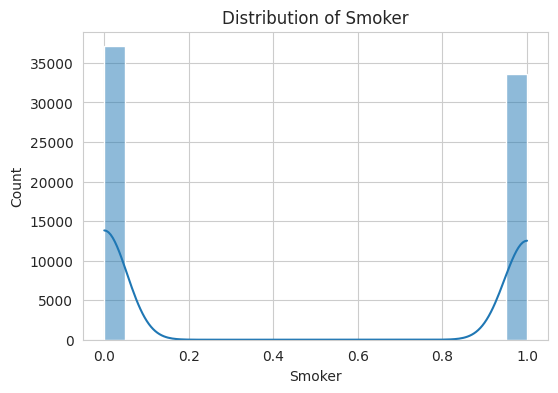

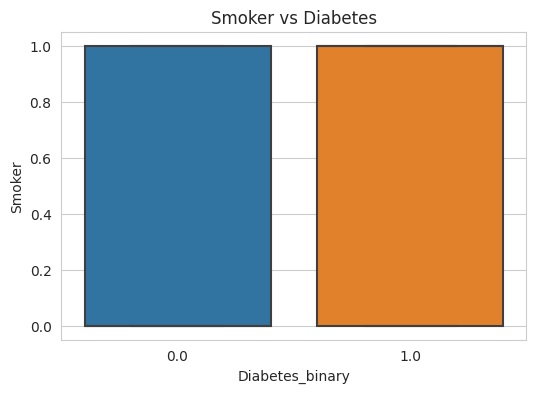

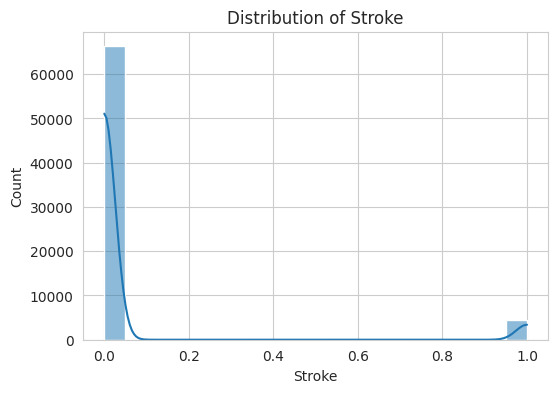

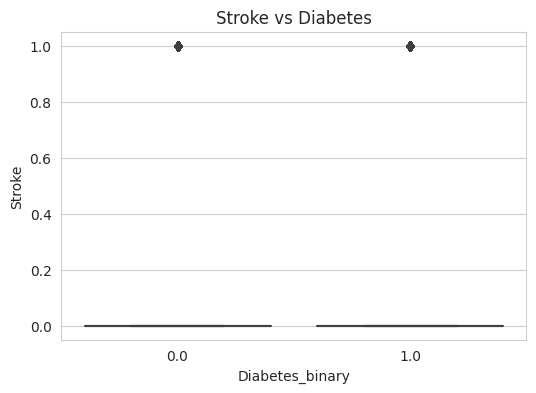

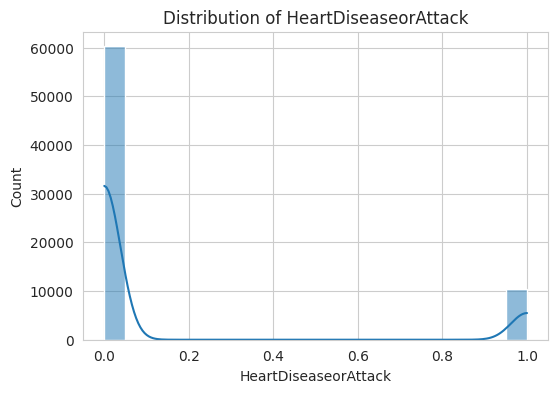

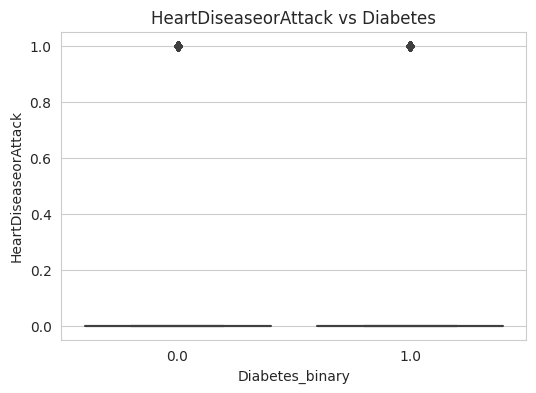

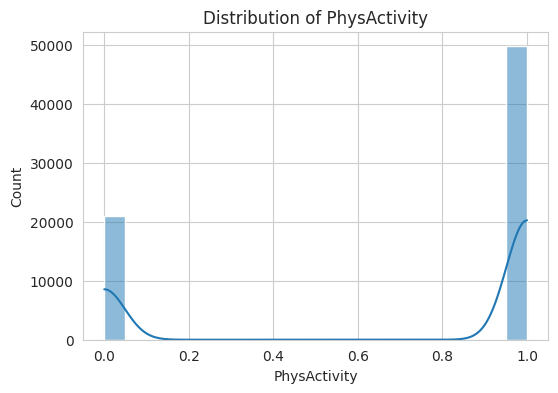

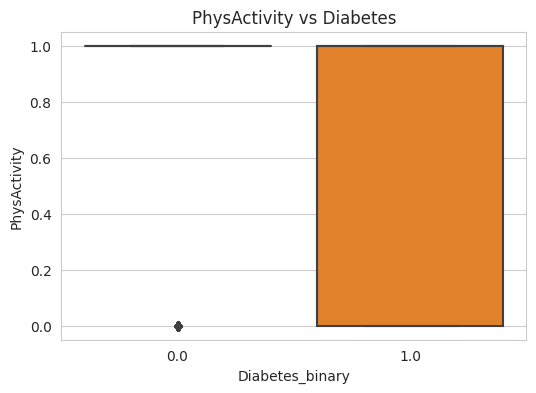

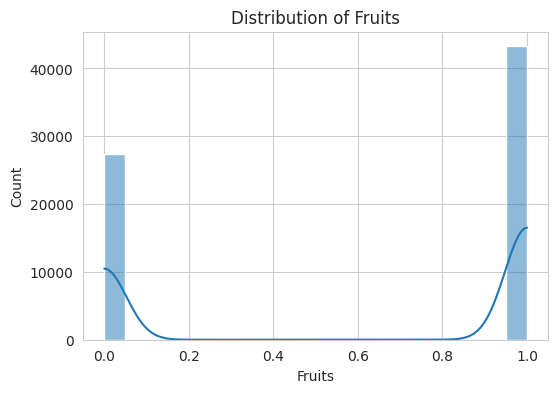

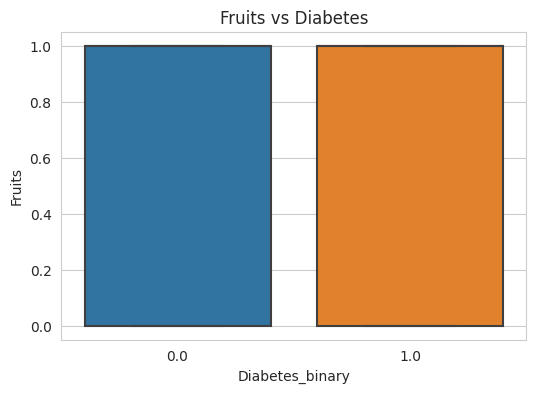

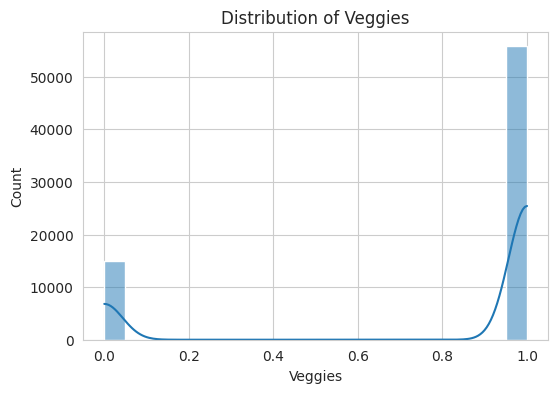

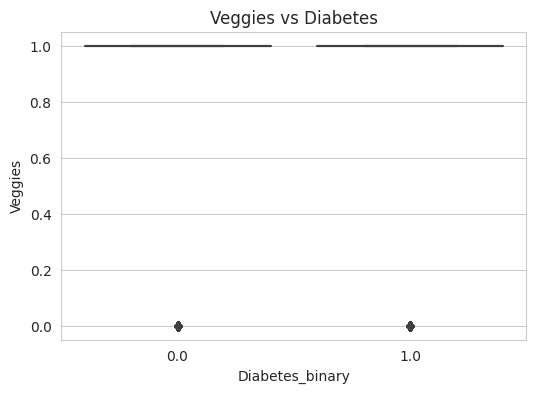

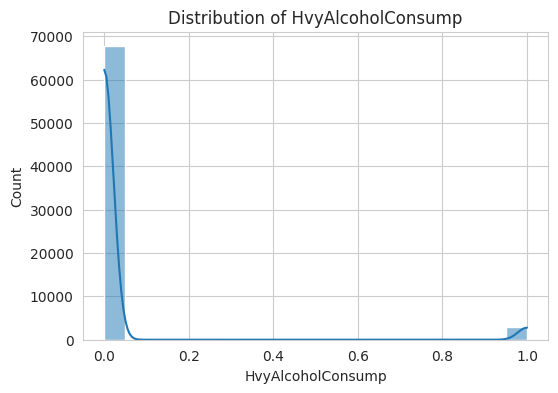

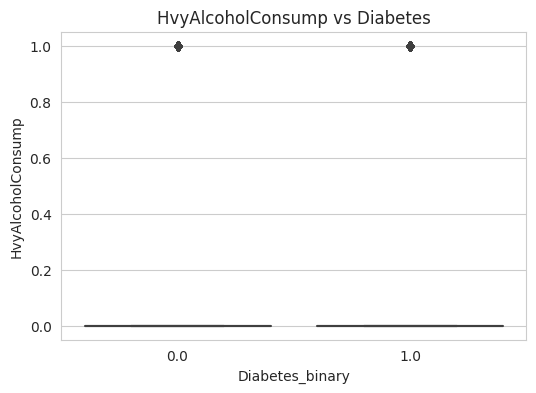

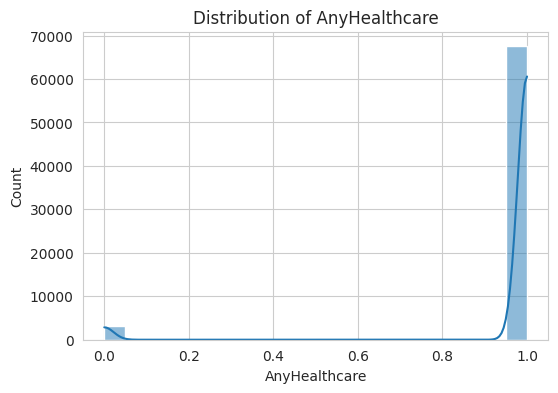

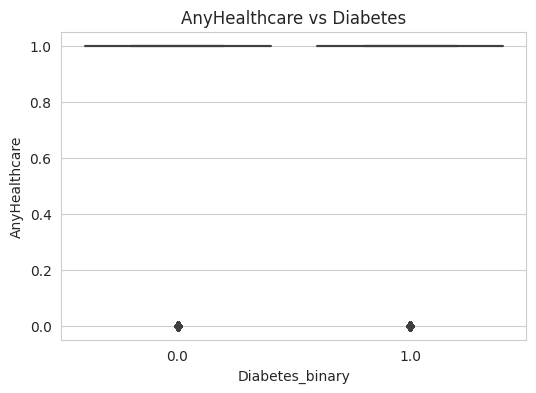

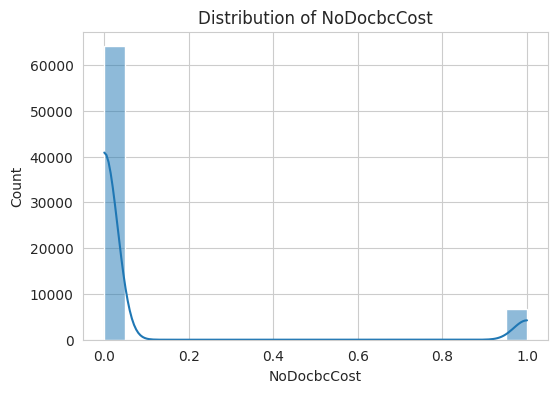

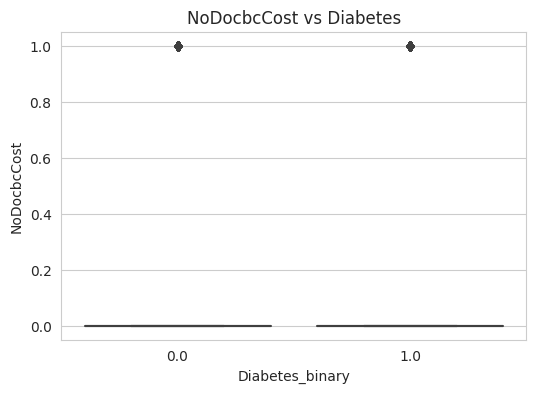

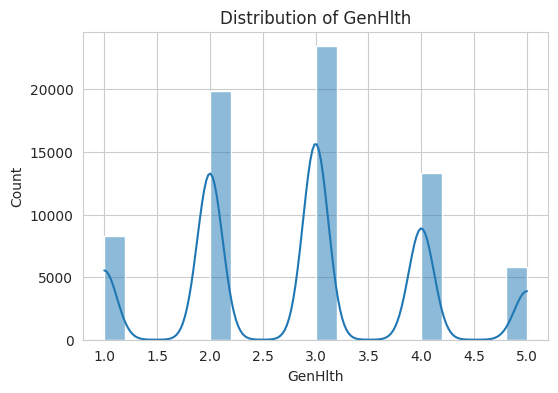

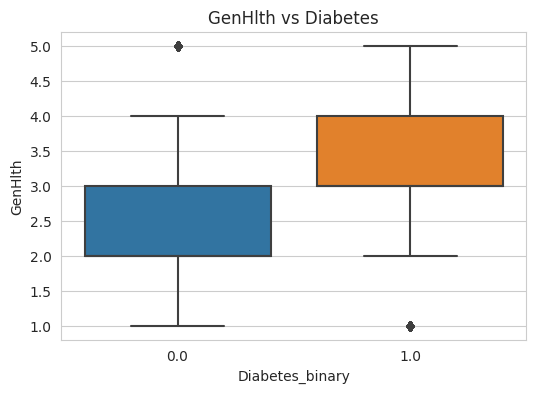

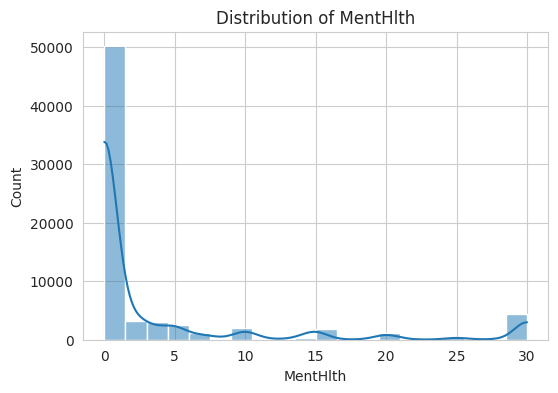

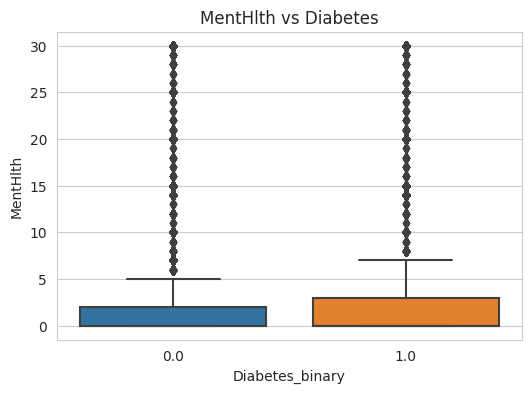

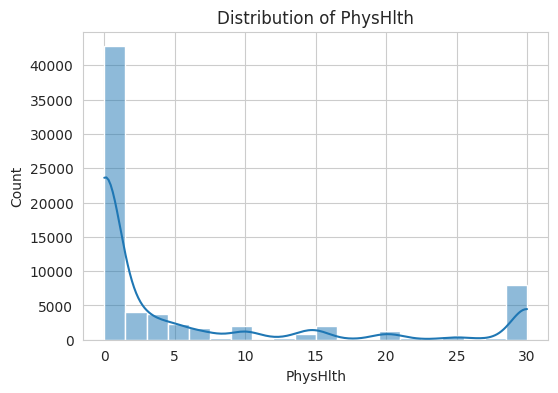

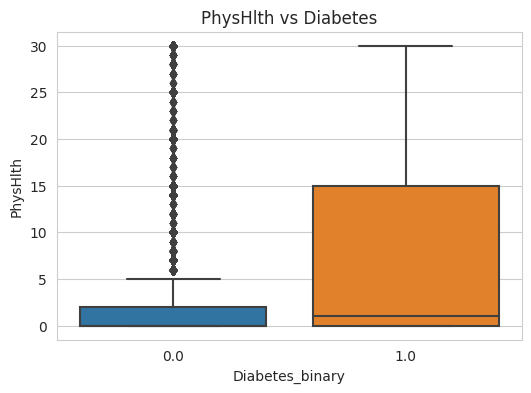

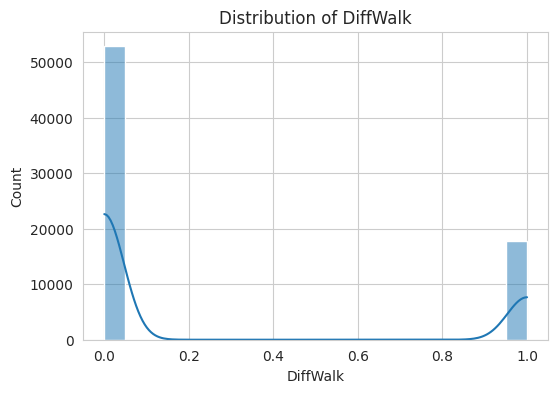

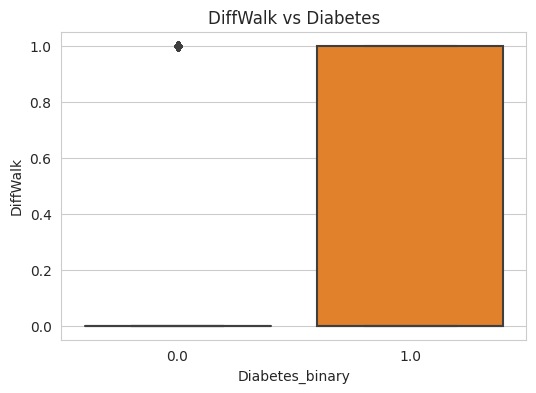

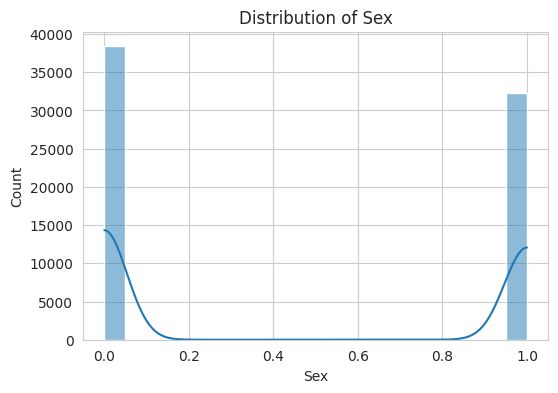

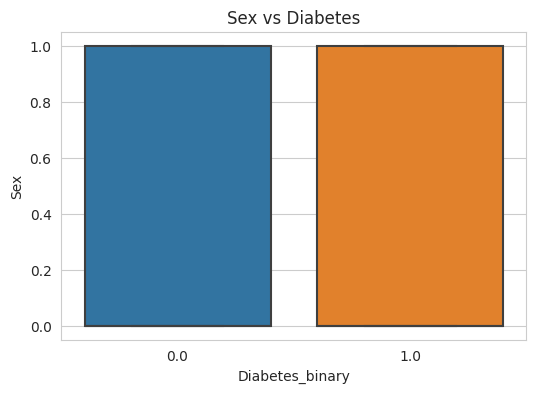

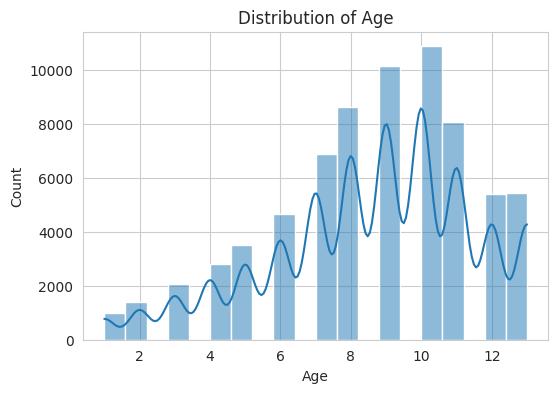

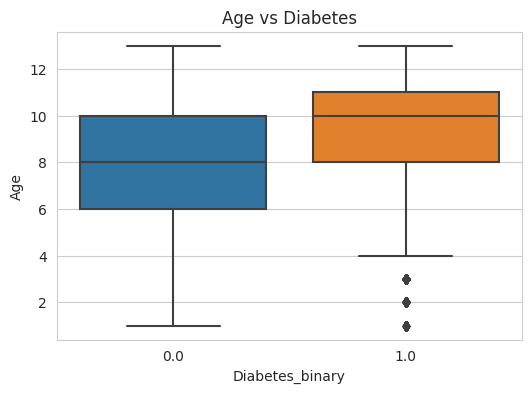

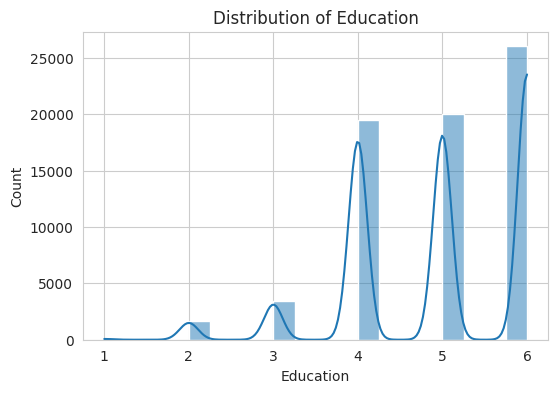

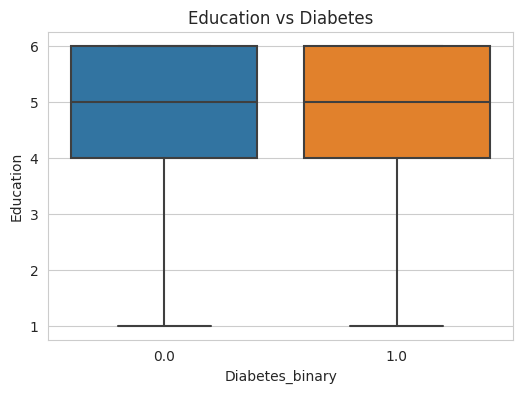

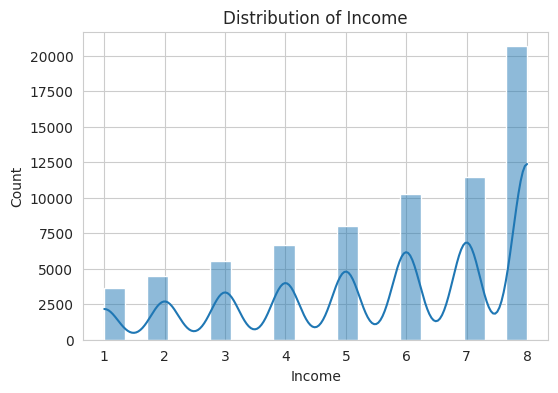

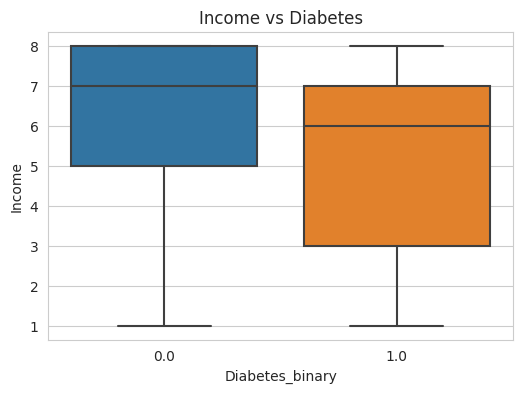

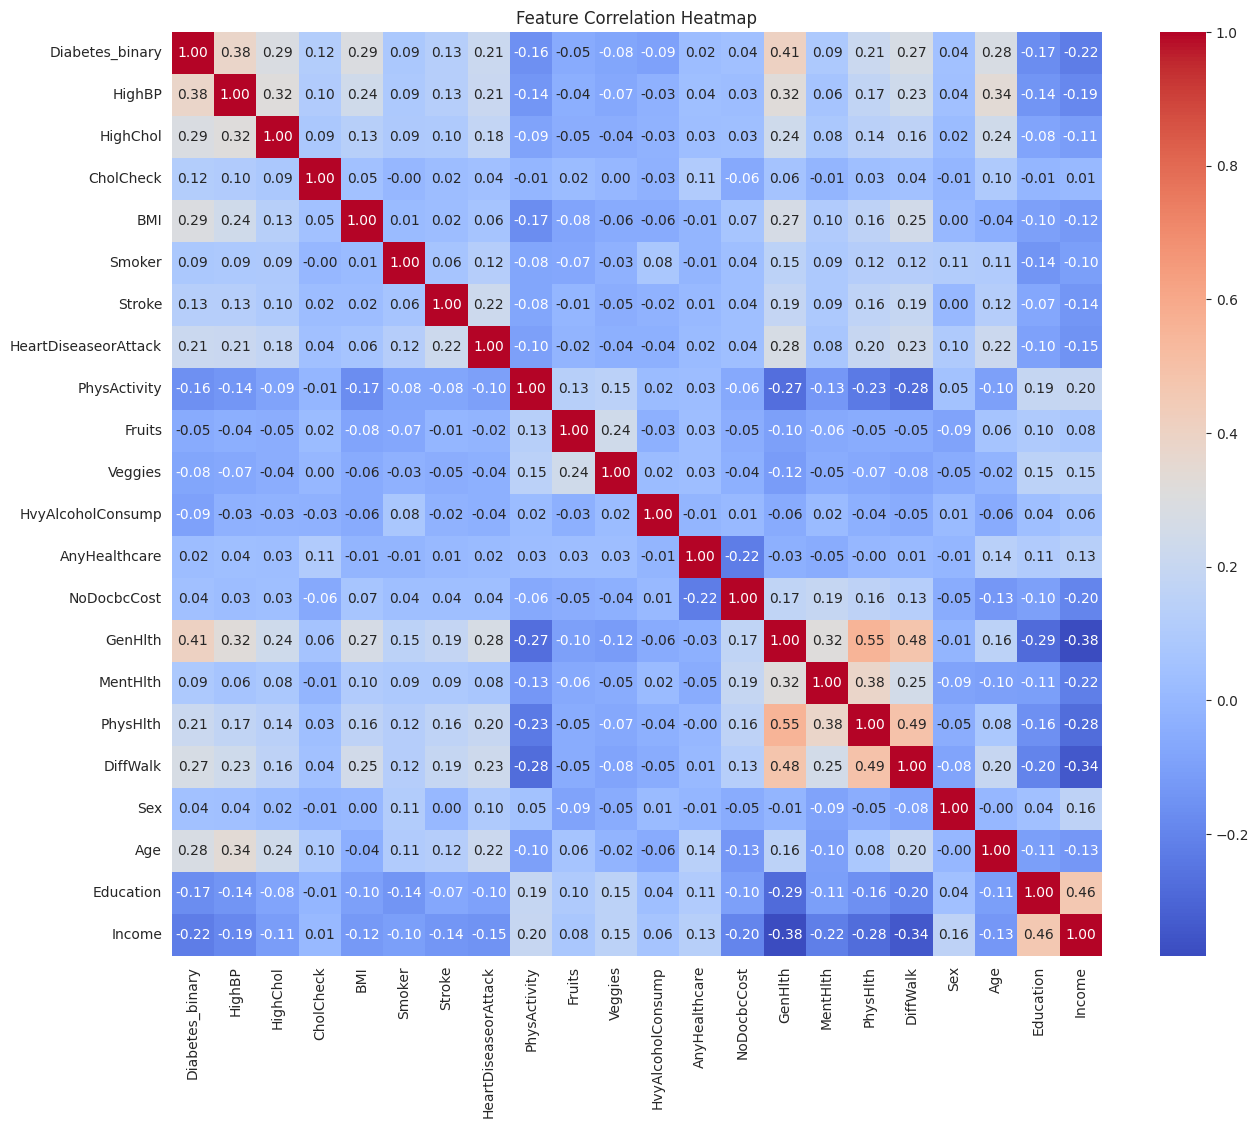

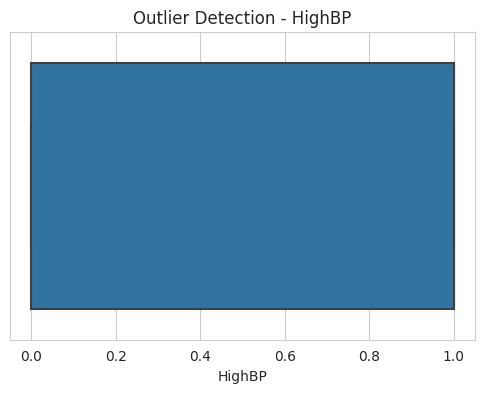

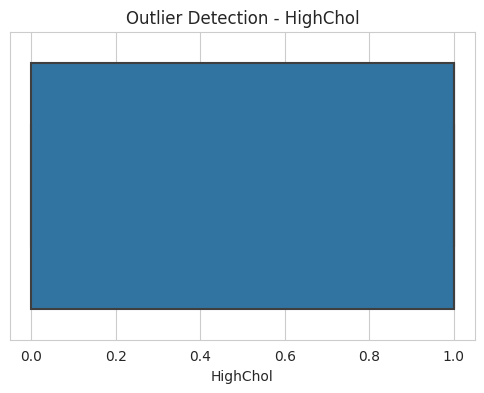

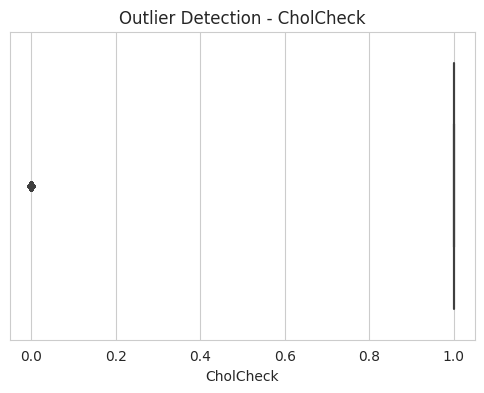

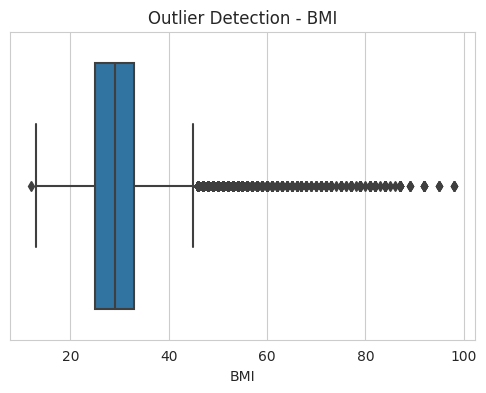

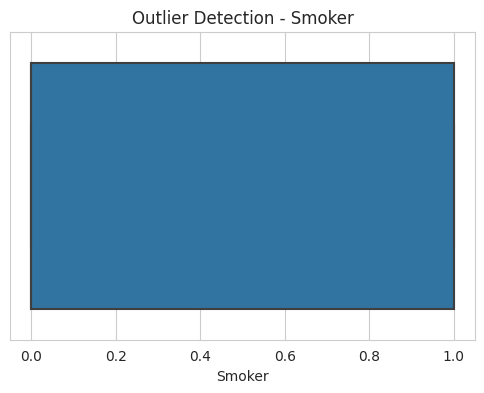

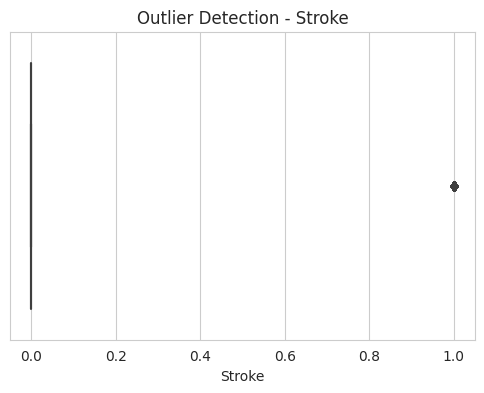

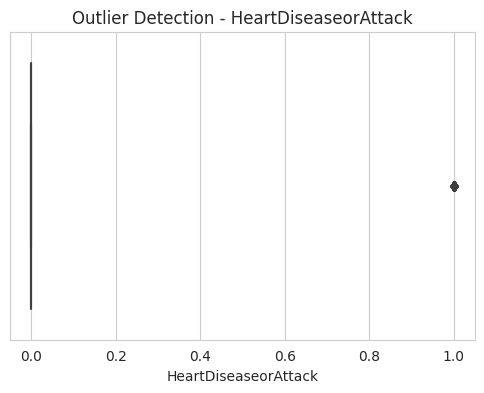

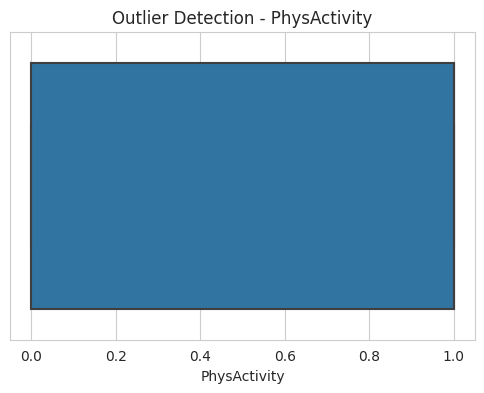

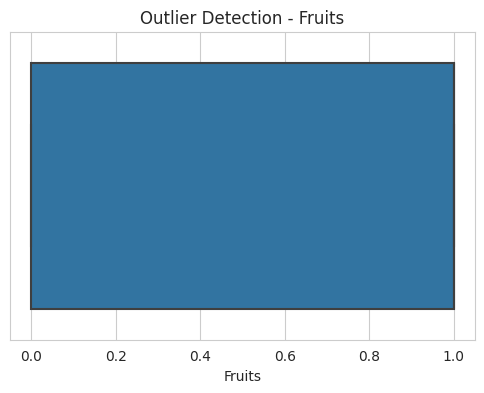

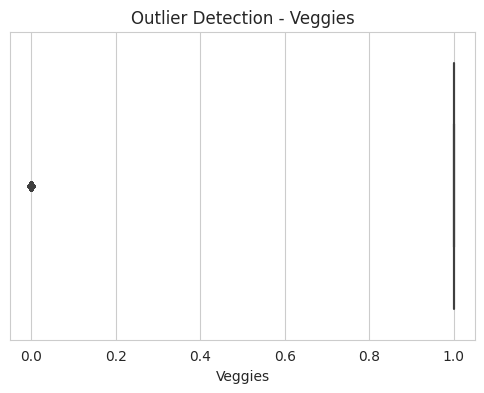

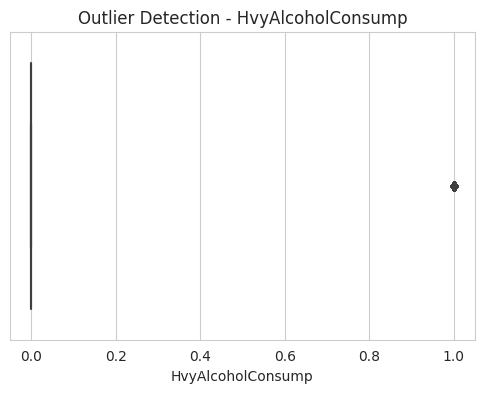

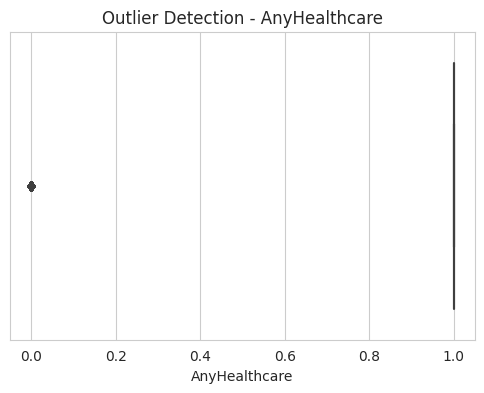

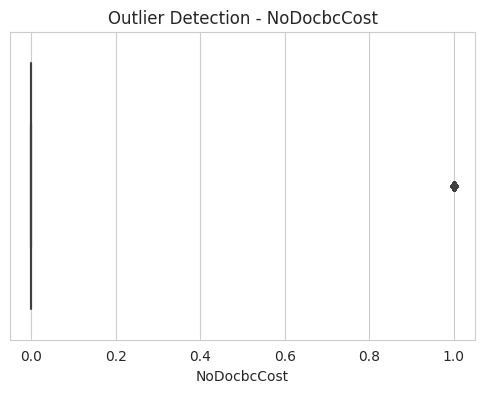

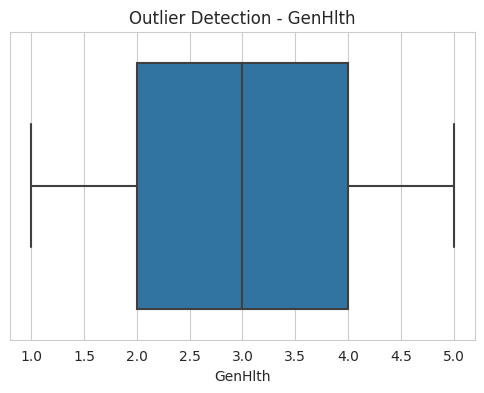

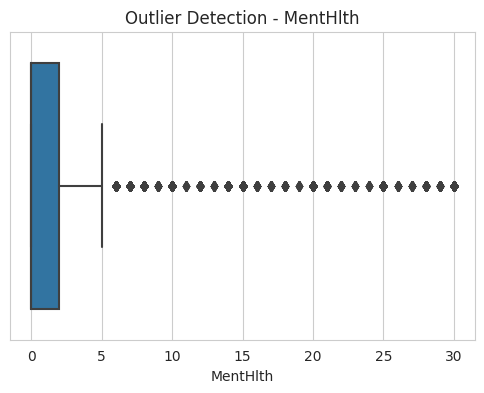

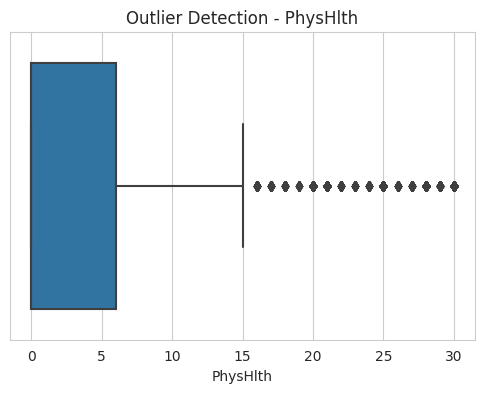

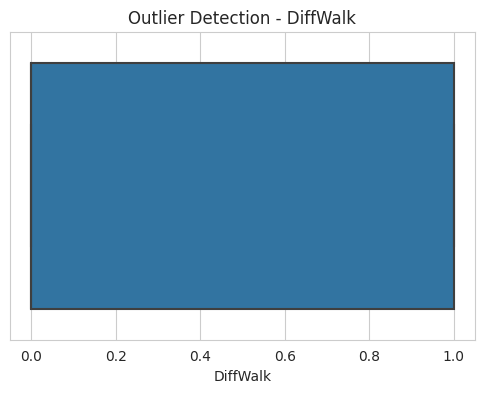

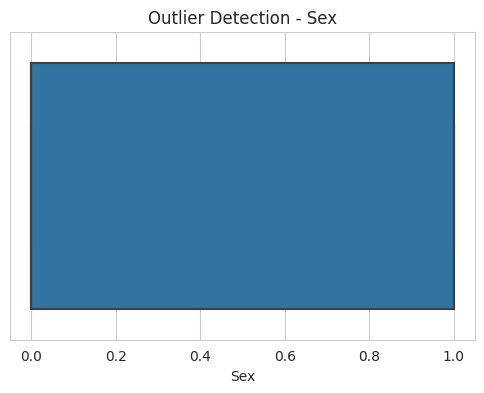

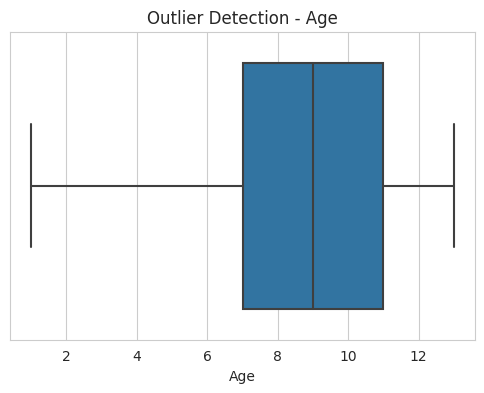

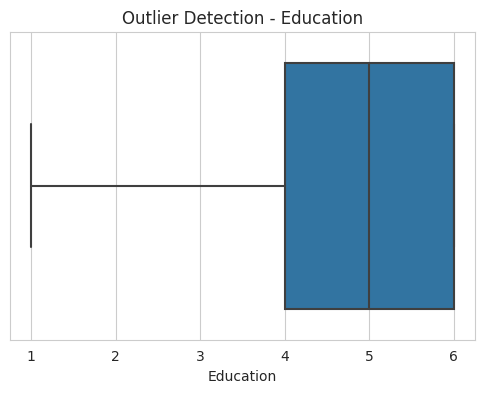

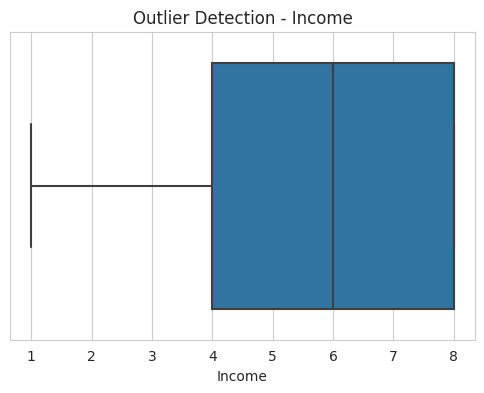


Insights Summary:
- Dataset is balanced: equal number of diabetic and non-diabetic samples
- No missing values detected
- Number of duplicate rows reported: 1635 
- Target variable distribution is balanced
- Numerical features show variation between diabetic and non-diabetic groups
- Correlation heatmap highlights potential important features for diabetes prediction


In [19]:
# ==========================================================
# 📊 Exploratory Data Analysis (EDA) - Numerical Features
# ==========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1️⃣ Load Dataset
# ---------------------------
print("="*80)
print("DATA LOADING")
print("="*80)

df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

print(f" Dataset loaded successfully")
print(f"  Shape: {df.shape}")
print(f"  Features: {df.shape[1]-1},Label: 1")
print(f"  Samples: {df.shape[0]}")
print("\nFirst 5 rows:\n", df.head())

# ---------------------------
# 2️⃣ Missing Values
# ---------------------------
print("\nMissing Values per Feature:")
print(df.isnull().sum())

# ---------------------------
# 3️⃣ Duplicates
# ---------------------------
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


# ---------------------------
# 4️⃣ Target Variable Analysis
# ---------------------------
print("\nDistribution of Target (Diabetes_binary):")
print(df['Diabetes_binary'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_binary', data=df)
plt.title("Distribution of Diabetes Status")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Count")
for i, count in enumerate(df['Diabetes_binary'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

# ---------------------------
# 5️⃣ Numerical Feature Analysis
# ---------------------------
num_features = df.columns.drop('Diabetes_binary')  # All features except target
for f in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[f], kde=True, bins=20)
    plt.title(f"Distribution of {f}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x='Diabetes_binary', y=f, data=df)
    plt.title(f"{f} vs Diabetes")
    plt.show()

# ---------------------------
# 6️⃣ Correlation Analysis
# ---------------------------
plt.figure(figsize=(15,12))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ---------------------------
# 7️⃣ Outlier Detection
# ---------------------------
for f in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[f])
    plt.title(f"Outlier Detection - {f}")
    plt.show()

# ---------------------------
# 🔹 Insights Summary
# ---------------------------
print("\nInsights Summary:")
print(f"- Dataset is balanced: equal number of diabetic and non-diabetic samples")
print(f"- No missing values detected")
print(f"- Number of duplicate rows reported: {num_duplicates} ")
print("- Target variable distribution is balanced")
print("- Numerical features show variation between diabetic and non-diabetic groups")
print("- Correlation heatmap highlights potential important features for diabetes prediction")


In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Number of nulls per column
null_counts = df.isnull().sum()

# Number of duplicate rows
num_duplicates = df.duplicated().sum()

# Create summary table
summary_table = pd.DataFrame({
    "Feature": list(null_counts.index) + ["Duplicate Rows"],
    "Missing Values": list(null_counts.values) + [num_duplicates]
})

print("\nMissing Values and Duplicates Summary:")
print(summary_table)



Missing Values and Duplicates Summary:
                 Feature  Missing Values
0        Diabetes_binary               0
1                 HighBP               0
2               HighChol               0
3              CholCheck               0
4                    BMI               0
5                 Smoker               0
6                 Stroke               0
7   HeartDiseaseorAttack               0
8           PhysActivity               0
9                 Fruits               0
10               Veggies               0
11     HvyAlcoholConsump               0
12         AnyHealthcare               0
13           NoDocbcCost               0
14               GenHlth               0
15              MentHlth               0
16              PhysHlth               0
17              DiffWalk               0
18                   Sex               0
19                   Age               0
20             Education               0
21                Income               0
22        Duplica

Number of duplicate rows: 1635


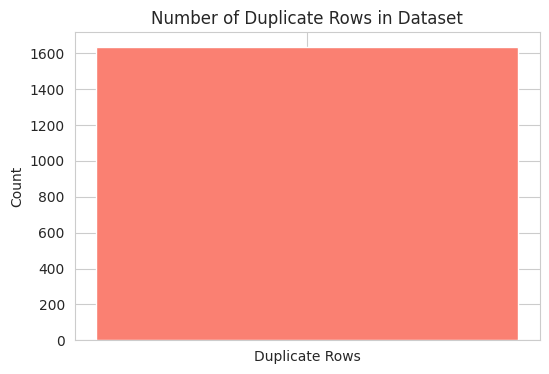

Missing values by class:
Diabetes_binary
0.0    0
1.0    0
dtype: int64


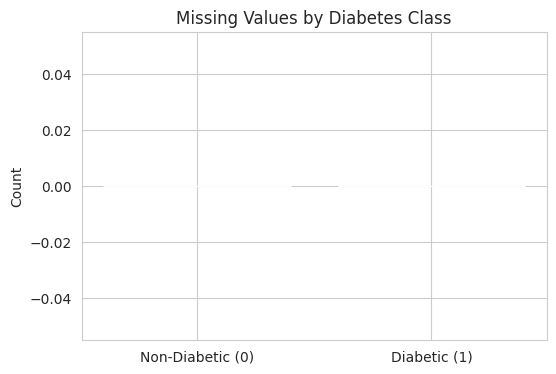

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# ---------------------------
# 1️⃣ Duplicate Rows
# ---------------------------
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

plt.figure(figsize=(6,4))
plt.bar(['Duplicate Rows'], [num_duplicates], color='salmon')
plt.title("Number of Duplicate Rows in Dataset")
plt.ylabel("Count")
plt.show()

# ---------------------------
# 2️⃣ Missing Values by Class
# ---------------------------
missing_classwise = df.groupby('Diabetes_binary').apply(lambda x: x.isnull().sum().sum())
print("Missing values by class:")
print(missing_classwise)

plt.figure(figsize=(6,4))
plt.bar(['Non-Diabetic (0)', 'Diabetic (1)'], missing_classwise.values, color='skyblue')
plt.title("Missing Values by Diabetes Class")
plt.ylabel("Count")
plt.show()


Top 5 Most Positively Correlated Features with Diabetes_binary
          Correlation
GenHlth      0.407612
HighBP       0.381516
BMI          0.293373
HighChol     0.289213
Age          0.278738


Top 5 Least (Most Negatively) Correlated Features with Diabetes_binary
                   Correlation
Veggies              -0.079293
HvyAlcoholConsump    -0.094853
PhysActivity         -0.158666
Education            -0.170481
Income               -0.224449




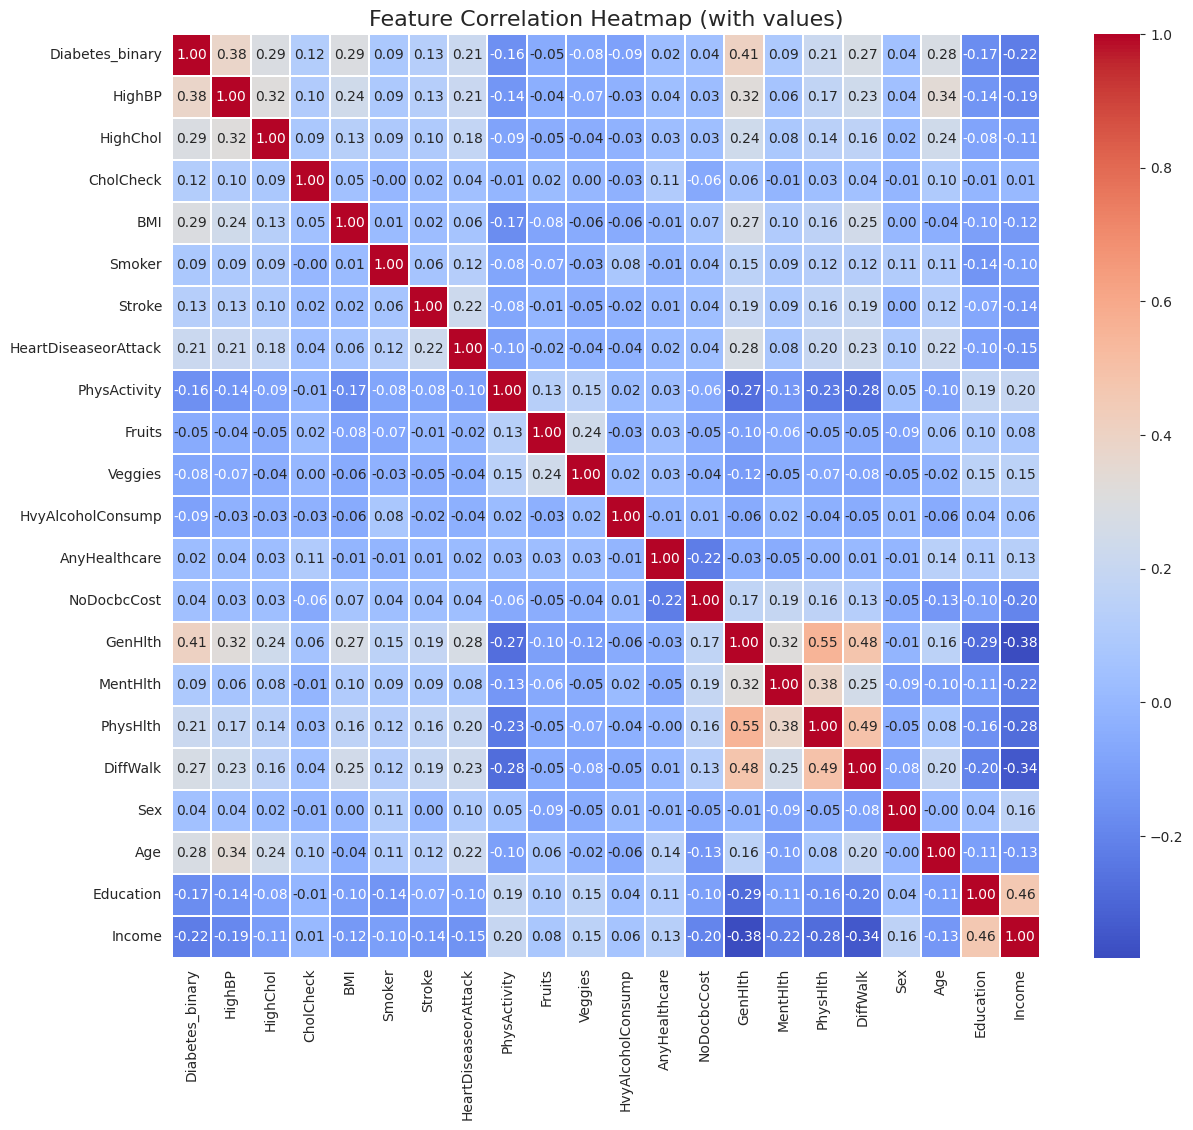

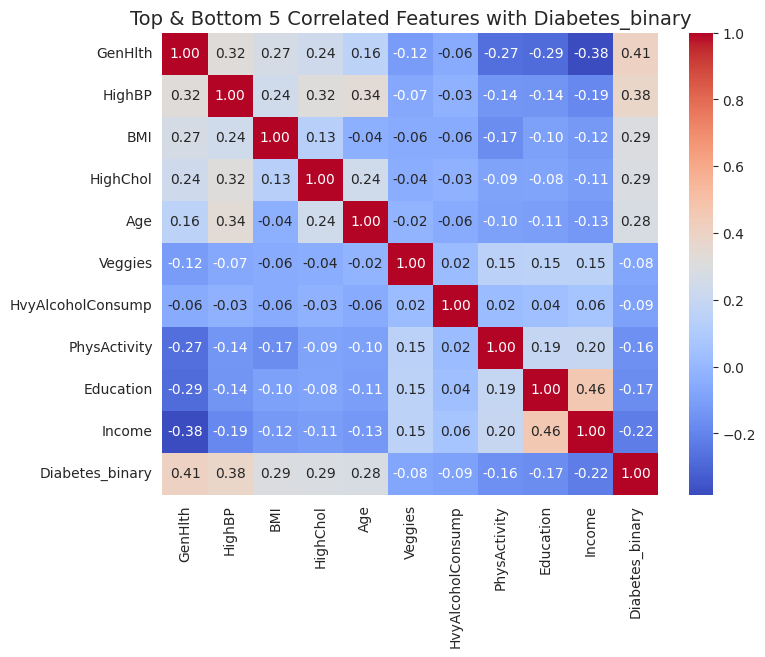

In [21]:
# ==========================================================
# 🔥 Correlation Analysis with Highlights & Annotated Heatmap
# ==========================================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------------------
# Compute correlation matrix
# ---------------------------
corr_matrix = df.corr()

# Correlation of all features with the target variable
target_corr = corr_matrix['Diabetes_binary'].drop('Diabetes_binary').sort_values(ascending=False)

# Top 5 most positively correlated features
top_5_corr = target_corr.head(5)
# 5 least (most negatively) correlated features
bottom_5_corr = target_corr.tail(5)

# ---------------------------
# 📋 Print Results
# ---------------------------
print("="*80)
print("Top 5 Most Positively Correlated Features with Diabetes_binary")
print("="*80)
print(top_5_corr.to_frame().rename(columns={'Diabetes_binary': 'Correlation'}))
print("\n")

print("="*80)
print("Top 5 Least (Most Negatively) Correlated Features with Diabetes_binary")
print("="*80)
print(bottom_5_corr.to_frame().rename(columns={'Diabetes_binary': 'Correlation'}))
print("\n")

# ---------------------------
# 📊 Full Annotated Heatmap
# ---------------------------
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.3)
plt.title("Feature Correlation Heatmap (with values)", fontsize=16)
plt.show()

# ---------------------------
# 🔹 Focused Heatmap (Top 5 + Bottom 5)
# ---------------------------
focused_features = list(top_5_corr.index) + list(bottom_5_corr.index) + ['Diabetes_binary']
plt.figure(figsize=(8,6))
sns.heatmap(df[focused_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top & Bottom 5 Correlated Features with Diabetes_binary", fontsize=14)
plt.show()


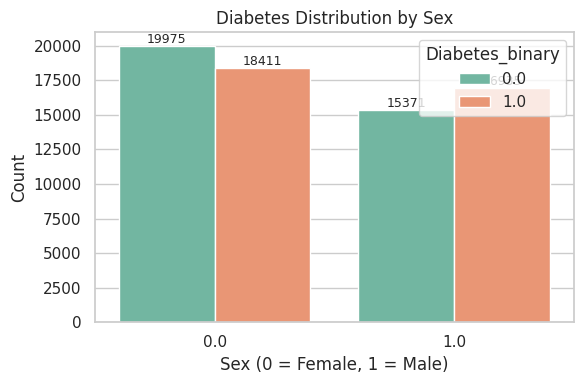

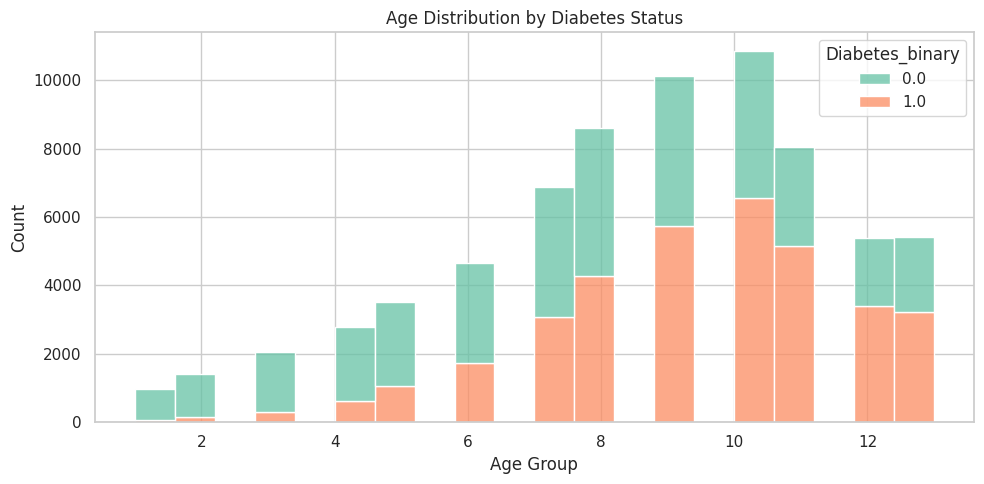

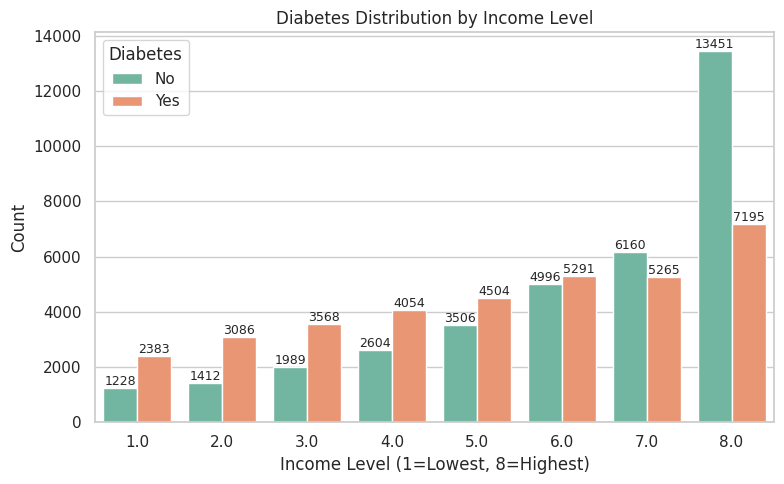


🧠 Insights from Demographic Distribution:
- Males (Sex=1) show a slightly higher proportion of diabetes compared to females.
- Diabetes prevalence increases noticeably with Age — especially after mid-age groups.
- Lower Income groups show higher diabetes counts, suggesting an inverse relationship between income and diabetes risk.


In [39]:
# ==========================================================
# 📊 Distribution Analysis: Sex, Age, and Income vs Diabetes
# ==========================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid", palette="Set2")

# ----------------------------------------
# 1️⃣ Diabetes Distribution by Sex
# ----------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Diabetes_binary', data=df)
plt.title("Diabetes Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")

# Add counts on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
plt.tight_layout()
plt.show()

# ----------------------------------------
# 2️⃣ Diabetes Distribution by Age
# ----------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='Diabetes_binary', multiple='stack', bins=20, kde=False)
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ----------------------------------------
# 3️⃣ Diabetes Distribution by Income
# ----------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='Income', hue='Diabetes_binary', data=df)
plt.title("Diabetes Distribution by Income Level")
plt.xlabel("Income Level (1=Lowest, 8=Highest)")
plt.ylabel("Count")
plt.legend(title="Diabetes", labels=["No", "Yes"])

# Add counts on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
plt.tight_layout()
plt.show()

# ----------------------------------------
# 🧠 Insights
# ----------------------------------------
print("\n🧠 Insights from Demographic Distribution:")
print("- Males (Sex=1) show a slightly higher proportion of diabetes compared to females.")
print("- Diabetes prevalence increases noticeably with Age — especially after mid-age groups.")
print("- Lower Income groups show higher diabetes counts, suggesting an inverse relationship between income and diabetes risk.")


Duplicate rows before removal: 1635
Duplicate rows after removal: 0
New data shape after removing duplicates: (69057, 22)


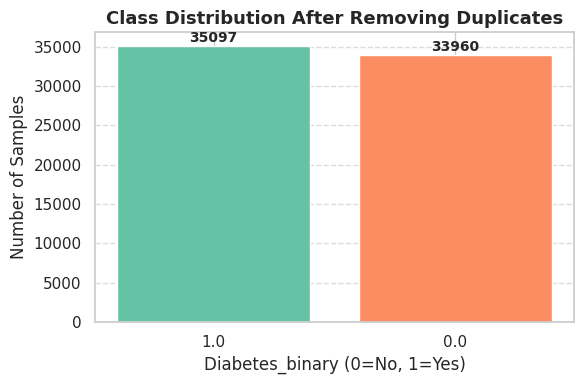

In [42]:
# Create a copy of the original DataFrame
new_data = df_original.copy()

# Check duplicates before dropping
duplicates_before = new_data.duplicated().sum()
print(f"Duplicate rows before removal: {duplicates_before}")

# Drop duplicate rows
new_data.drop_duplicates(inplace=True)

# Check duplicates after dropping
duplicates_after = new_data.duplicated().sum()
print(f"Duplicate rows after removal: {duplicates_after}")

# Print new shape
print(f"✅ New data shape after removing duplicates: {new_data.shape}")


In [43]:
# Check data types
print("Data Types:\n")
print(new_data.dtypes)

# Quick overview: first few rows
print("\nFirst 5 rows:\n")
print(new_data.head())

# Check unique values for all columns (first 10 unique values for brevity)
print("\nUnique values per column:\n")
for col in new_data.columns:
    unique_vals = new_data[col].unique()
    print(f"{col}: {unique_vals[:10]} ... total unique={len(unique_vals)}")


Data Types:

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

First 5 rows:

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0

BINARY FEATURES ALSO IN DATA


In [10]:
import pandas as pd

# 1️⃣ Load raw data
df_original = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

# 2️⃣ Check data types
print("Data Types of Raw Data:\n")
print(df_original.dtypes)

# 3️⃣ Display first 5 rows
print("\nFirst 5 rows of Raw Data:\n")
print(df_original.head())

# 4️⃣ Check unique values for all columns (first 10 unique values for brevity)
print("\nUnique values per column in Raw Data:\n")
for col in df_original.columns:
    unique_vals = df_original[col].unique()
    print(f"{col}: {unique_vals[:10]} ... total unique={len(unique_vals)}")


Data Types of Raw Data:

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

First 5 rows of Raw Data:

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2         

In [26]:
import pandas as pd

# Load data
df_original = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

# Total samples and features
n_samples, n_features = df_original.shape
print(f"Total samples: {n_samples}")
print(f"Total Columns (including label): {n_features}")
print(f"Features: {n_features-1},Label:1")
print(f"Label column: 'Diabetes_binary' (Binary 0/1)\n")

# Function to classify feature type
def classify_feature(col, unique_vals):
    if len(unique_vals) == 2 and set(unique_vals).issubset({0,1}):
        return "Binary"
    elif col in ['BMI', 'MentHlth', 'PhysHlth']:
        return "Continuous"
    else:
        return "Ordinal"

# Print summary table
print(f"{'Column':30} {'Data Type':10} {'# Unique':10} {'Feature Type':10}")
print("-"*70)
for col in df_original.columns:
    unique_vals = df_original[col].unique()
    feature_type = classify_feature(col, unique_vals)
    print(f"{col:30} {str(df_original[col].dtype):10} {len(unique_vals):10} {feature_type:10}")


Total samples: 253680
Total Columns (including label): 22
Features: 21,Label:1
Label column: 'Diabetes_binary' (Binary 0/1)

Column                         Data Type  # Unique   Feature Type
----------------------------------------------------------------------
Diabetes_binary                float64             2 Binary    
HighBP                         float64             2 Binary    
HighChol                       float64             2 Binary    
CholCheck                      float64             2 Binary    
BMI                            float64            84 Continuous
Smoker                         float64             2 Binary    
Stroke                         float64             2 Binary    
HeartDiseaseorAttack           float64             2 Binary    
PhysActivity                   float64             2 Binary    
Fruits                         float64             2 Binary    
Veggies                        float64             2 Binary    
HvyAlcoholConsump              flo

In [20]:
import pandas as pd

# Load data
df = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Total samples and features
n_samples, n_features = df_original.shape
print(f"Total samples: {n_samples}")
print(f"Total Columns (including label): {n_features}")
print(f"Features: {n_features-1},Label:1")
print(f"Label column: 'Diabetes_binary' (Binary 0/1)\n")

# Function to classify feature type
def classify_feature(col, unique_vals):
    if len(unique_vals) == 2 and set(unique_vals).issubset({0,1}):
        return "Binary"
    elif col in ['BMI', 'MentHlth', 'PhysHlth']:
        return "Continuous"
    else:
        return "Ordinal"

# Print summary table
print(f"{'Column':30} {'Data Type':10} {'# Unique':10} {'Feature Type':10}")
print("-"*70)
for col in df_original.columns:
    unique_vals = df_original[col].unique()
    feature_type = classify_feature(col, unique_vals)
    print(f"{col:30} {str(df_original[col].dtype):10} {len(unique_vals):10} {feature_type:10}")


Total samples: 70692
Total Columns (including label): 22
Features: 21,Label:1
Label column: 'Diabetes_binary' (Binary 0/1)

Column                         Data Type  # Unique   Feature Type
----------------------------------------------------------------------
Diabetes_binary                float64             2 Binary    
HighBP                         float64             2 Binary    
HighChol                       float64             2 Binary    
CholCheck                      float64             2 Binary    
BMI                            float64            80 Continuous
Smoker                         float64             2 Binary    
Stroke                         float64             2 Binary    
HeartDiseaseorAttack           float64             2 Binary    
PhysActivity                   float64             2 Binary    
Fruits                         float64             2 Binary    
Veggies                        float64             2 Binary    
HvyAlcoholConsump              floa

Top 5 Most Positively Correlated Features with Diabetes_binary
          Correlation
GenHlth      0.407612
HighBP       0.381516
BMI          0.293373
HighChol     0.289213
Age          0.278738


Top 5 Least (Most Negatively) Correlated Features with Diabetes_binary
                   Correlation
Veggies              -0.079293
HvyAlcoholConsump    -0.094853
PhysActivity         -0.158666
Education            -0.170481
Income               -0.224449




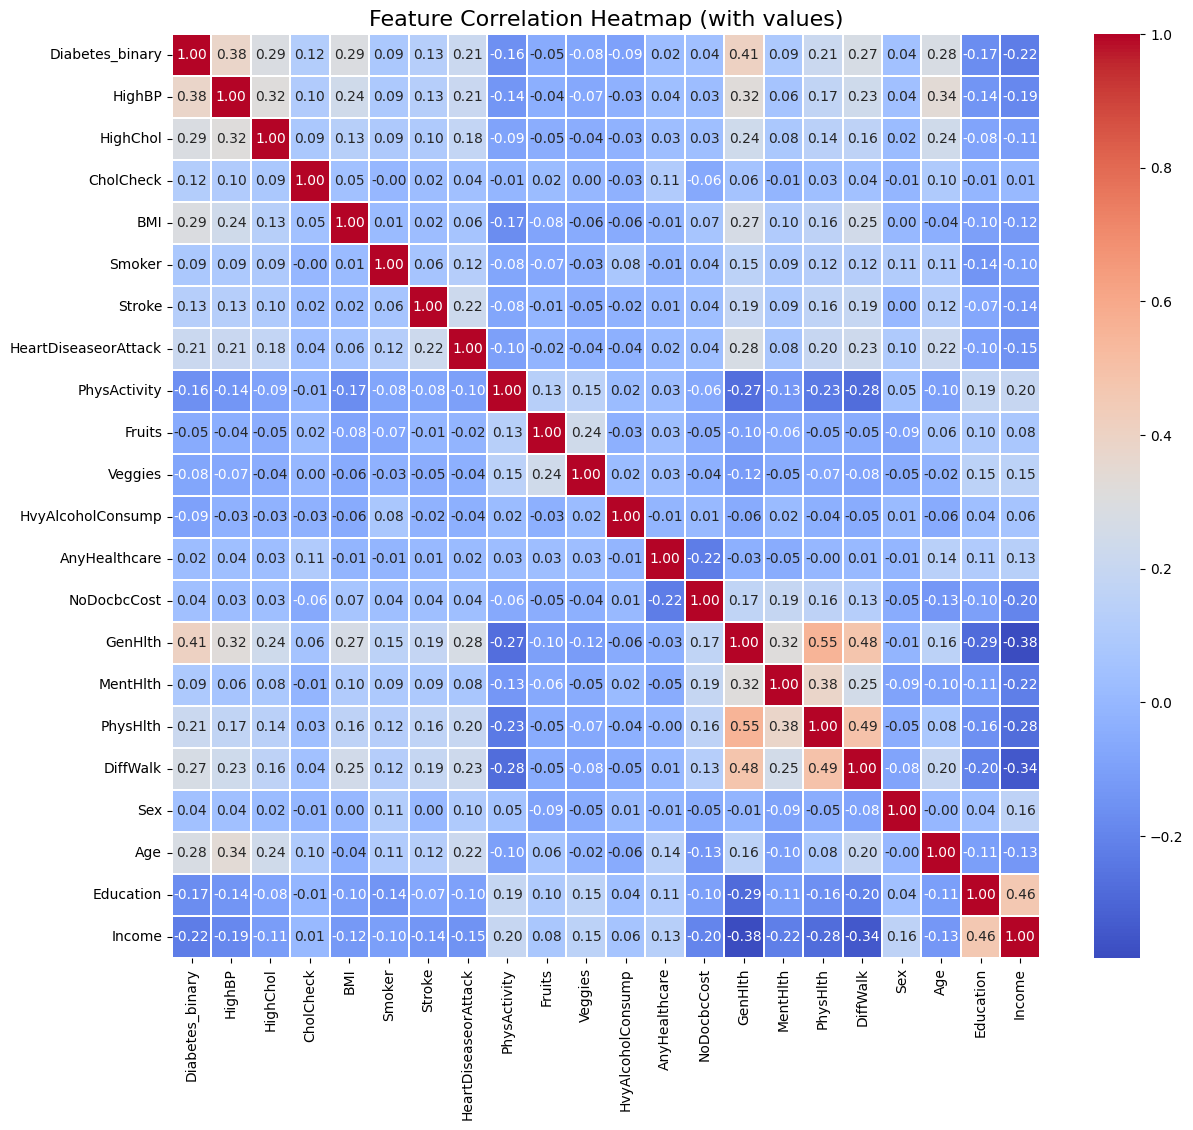

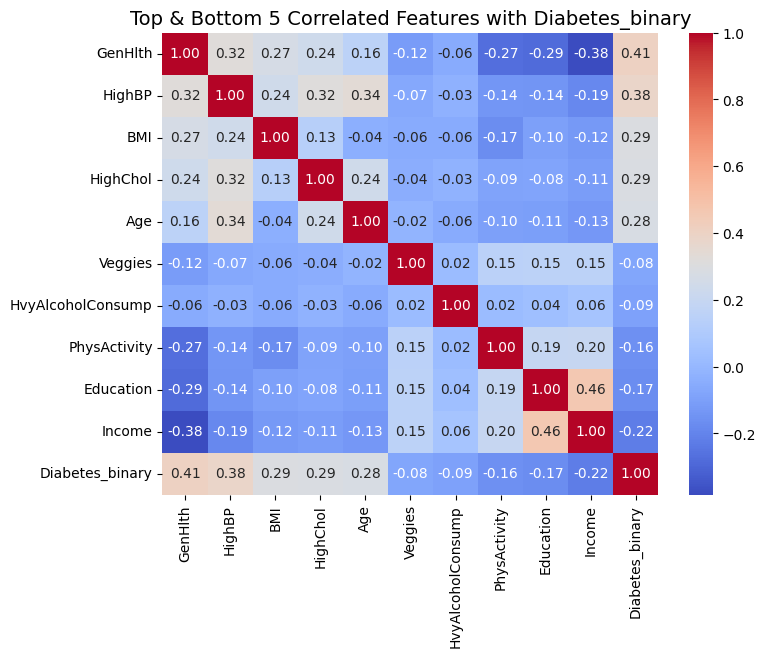

In [21]:
# ==========================================================
# 🔥 Correlation Analysis with Highlights & Annotated Heatmap
# ==========================================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------------------
# Compute correlation matrix
# ---------------------------
corr_matrix = df.corr()

# Correlation of all features with the target variable
target_corr = corr_matrix['Diabetes_binary'].drop('Diabetes_binary').sort_values(ascending=False)

# Top 5 most positively correlated features
top_5_corr = target_corr.head(5)
# 5 least (most negatively) correlated features
bottom_5_corr = target_corr.tail(5)

# ---------------------------
# 📋 Print Results
# ---------------------------
print("="*80)
print("Top 5 Most Positively Correlated Features with Diabetes_binary")
print("="*80)
print(top_5_corr.to_frame().rename(columns={'Diabetes_binary': 'Correlation'}))
print("\n")

print("="*80)
print("Top 5 Least (Most Negatively) Correlated Features with Diabetes_binary")
print("="*80)
print(bottom_5_corr.to_frame().rename(columns={'Diabetes_binary': 'Correlation'}))
print("\n")

# ---------------------------
# 📊 Full Annotated Heatmap
# ---------------------------
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.3)
plt.title("Feature Correlation Heatmap (with values)", fontsize=16)
plt.show()

# ---------------------------
# 🔹 Focused Heatmap (Top 5 + Bottom 5)
# ---------------------------
focused_features = list(top_5_corr.index) + list(bottom_5_corr.index) + ['Diabetes_binary']
plt.figure(figsize=(8,6))
sns.heatmap(df[focused_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top & Bottom 5 Correlated Features with Diabetes_binary", fontsize=14)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

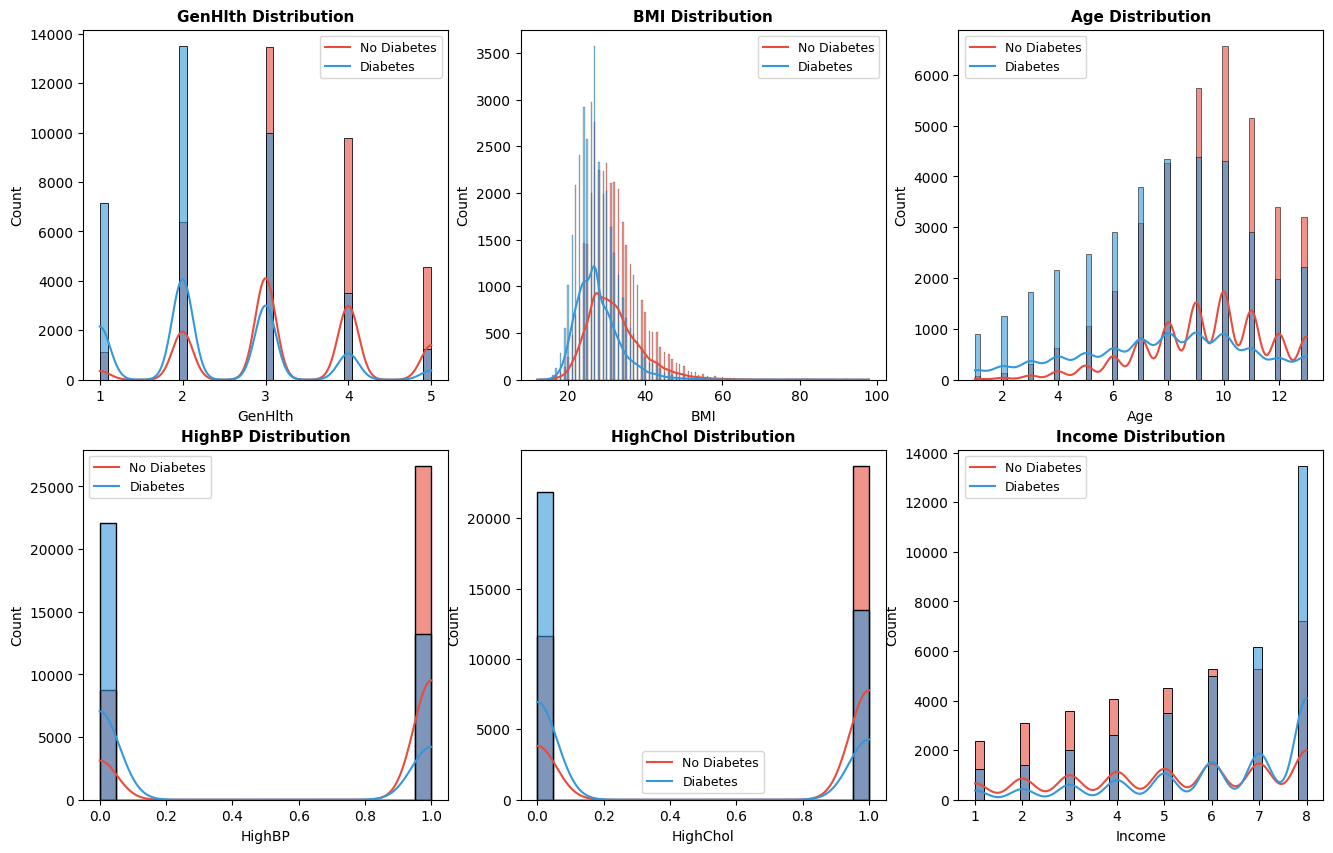

In [22]:

# GRAPH 3: Feature Distributions
key_features = ['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'Income']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    sns.histplot(data=df, x=feature, hue='Diabetes_binary', 
                 kde=True, ax=axes[idx], palette=['#3498db', '#e74c3c'], alpha=0.6)
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].legend(['No Diabetes', 'Diabetes'], fontsize=9)


In [52]:
# Create a copy of the original DataFrame
df_duplicate_dropped = df.copy()

# Check duplicates before dropping
duplicates_before = df_duplicate_dropped.duplicated().sum()
print(f"Duplicate rows before removal: {duplicates_before}")

# Drop duplicate rows
df_duplicate_dropped.drop_duplicates(inplace=True)

# Check duplicates after dropping
duplicates_after = df_duplicate_dropped.duplicated().sum()
print(f"Duplicate rows after removal: {duplicates_after}")

# Print new shape
print(f"✅df_duplicate_dropped shape after removing duplicates: {df_duplicate_dropped.shape}")


Duplicate rows before removal: 1635
Duplicate rows after removal: 0
✅df_duplicate_dropped shape after removing duplicates: (69057, 22)


In [53]:
import pandas as pd
import numpy as np

# Copy original data
new_data = df_duplicate_dropped.copy()

# Features to check for outliers
features = ['BMI', 'GenHlth']

# Use IQR to remove only extreme outliers (beyond 5*IQR instead of 1.5*IQR)
for col in features:
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR  # only extreme lower outliers
    upper_bound = Q3 + 5 * IQR  # only extreme upper outliers
    before_rows = new_data.shape[0]
    new_data = new_data[(new_data[col] >= lower_bound) & (new_data[col] <= upper_bound)]
    after_rows = new_data.shape[0]
    print(f"{col}: Removed {before_rows - after_rows} extreme outliers")

print(f"\n✅ New data shape after removing only extreme outliers: {new_data.shape}")


BMI: Removed 119 extreme outliers
GenHlth: Removed 0 extreme outliers

✅ New data shape after removing only extreme outliers: (68938, 22)


Data Shape after removing Outliers: (68938, 22)
Class distribution:
Diabetes_binary
1.0    35036
0.0    33902
Name: count, dtype: int64


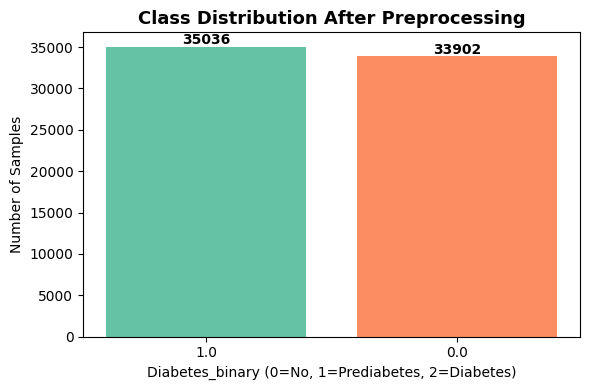

In [54]:
import matplotlib.pyplot as plt

class_counts = new_data['Diabetes_binary'].value_counts()
print("Data Shape after removing Outliers:",new_data.shape)
print("Class distribution:")
print(class_counts)

# Bar plot
plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['#66c2a5','#fc8d62','#8da0cb'])
plt.title('Class Distribution After Preprocessing', fontsize=13, fontweight='bold')
plt.xlabel('Diabetes_binary (0=No, 1=Prediabetes, 2=Diabetes)')
plt.ylabel('Number of Samples')
for i, val in enumerate(class_counts.values):
    plt.text(i, val + 300, f'{val}', ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Use cleaned dataset
df = new_data.copy()

# -------------------------------
# 1️⃣ BMI vs Diabetes_binary (t-test)
# -------------------------------
bmi_diabetes = df[df['Diabetes_binary']==1]['BMI']
bmi_no_diabetes = df[df['Diabetes_binary']==0]['BMI']
t_stat_bmi, p_bmi = ttest_ind(bmi_diabetes, bmi_no_diabetes)

print(" BMI vs Diabetes_binary (t-test)")
print(f"t-statistic: {t_stat_bmi:.3f}, p-value: {p_bmi:.5f}")
print("Significant difference" if p_bmi < 0.05 else "No significant difference")
print("-"*60)

# -------------------------------
# 2️⃣ HighBP vs Diabetes_binary (Chi-Square)
# -------------------------------
cont_highbp = pd.crosstab(df['HighBP'], df['Diabetes_binary'])
chi2_highbp, p_highbp, dof, ex = chi2_contingency(cont_highbp)

print("2️⃣ HighBP vs Diabetes_binary (Chi-Square)")
print(cont_highbp)
print(f"Chi2: {chi2_highbp:.3f}, p-value: {p_highbp:.5f}")
print("Significant association" if p_highbp < 0.05 else "No significant association")
print("-"*60)

# -------------------------------
# 3️⃣ GenHlth vs Diabetes_binary (Chi-Square)
# -------------------------------
cont_genhlth = pd.crosstab(df['GenHlth'], df['Diabetes_binary'])
chi2_genhlth, p_genhlth, dof, ex = chi2_contingency(cont_genhlth)

print("3️⃣ GenHlth vs Diabetes_binary (Chi-Square)")
print(cont_genhlth)
print(f"Chi2: {chi2_genhlth:.3f}, p-value: {p_genhlth:.5f}")
print("Significant association" if p_genhlth < 0.05 else "No significant association")
print("-"*60)

# -------------------------------
# 4️⃣ Sex vs Diabetes_binary (Chi-Square)
# -------------------------------
cont_sex = pd.crosstab(df['Sex'], df['Diabetes_binary'])
chi2_sex, p_sex, dof, ex = chi2_contingency(cont_sex)

print("4️⃣ Sex vs Diabetes_binary (Chi-Square)")
print(cont_sex)
print(f"Chi2: {chi2_sex:.3f}, p-value: {p_sex:.5f}")
print("Significant association" if p_sex < 0.05 else "No significant association")
print("-"*60)

# -------------------------------
# 5️⃣ Education vs Diabetes_binary (Chi-Square)
# -------------------------------
cont_edu = pd.crosstab(df['Education'], df['Diabetes_binary'])
chi2_edu, p_edu, dof, ex = chi2_contingency(cont_edu)

print("5️⃣ Education vs Diabetes_binary (Chi-Square)")
print(cont_edu)
print(f"Chi2: {chi2_edu:.3f}, p-value: {p_edu:.5f}")
print("Significant association" if p_edu < 0.05 else "No significant association")
print("-"*60)

# -------------------------------
# 6️⃣ Income vs Diabetes_binary (t-test)
# -------------------------------
income_diabetes = df[df['Diabetes_binary']==1]['Income']
income_no_diabetes = df[df['Diabetes_binary']==0]['Income']
t_stat_income, p_income = ttest_ind(income_diabetes, income_no_diabetes)

print("6️⃣ Income vs Diabetes_binary (t-test)")
print(f"t-statistic: {t_stat_income:.3f}, p-value: {p_income:.5f}")
print("Significant difference" if p_income < 0.05 else "No significant difference")
print("-"*60)


1️⃣ BMI vs Diabetes_binary (t-test)
t-statistic: 82.677, p-value: 0.00000
Significant difference
------------------------------------------------------------
2️⃣ HighBP vs Diabetes_binary (Chi-Square)
Diabetes_binary    0.0    1.0
HighBP                       
0.0              20877   8678
1.0              13025  26358
Chi2: 9531.480, p-value: 0.00000
Significant association
------------------------------------------------------------
3️⃣ GenHlth vs Diabetes_binary (Chi-Square)
Diabetes_binary    0.0    1.0
GenHlth                      
1.0               6461   1133
2.0              12802   6271
3.0               9910  13304
4.0               3501   9772
5.0               1228   4556
Chi2: 11332.825, p-value: 0.00000
Significant association
------------------------------------------------------------
4️⃣ Sex vs Diabetes_binary (Chi-Square)
Diabetes_binary    0.0    1.0
Sex                          
0.0              19159  18311
1.0              14743  16725
Chi2: 125.236, p-value: 0.00